# **Librerias**

In [1]:
# Importamos 

import ot
import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from matplotlib import gridspec
from scipy.stats import geom, binom, poisson, norm, expon, gamma

# Version 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Optimal Transport Version: {ot.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.0.2
Scipy Version: 1.13.1
Optimal Transport Version: 0.9.5
Matplotlib Version: 3.9.4


# **Distancia Total Variacional** 

La **Distancia Total Variacional** entre **dos distribuciones** de probabilidad mide **cuánta probabilidad difieren en total**. Se interpreta como la **cantidad máxima de probabilidad** que asignan de forma diferente a los mismos eventos.

* **Distribuciones Discretas**

$$\delta(X, Y) = \frac{1}{2} \sum_i |P(X = x) - P(Y = x)|$$

* **Distribuciones Continuas** 

$$\delta(X, Y) = \frac{1}{2} \int_\Omega |p(x) - q(x)| \hspace{0.1cm} dx$$

El valor del estadistico de **Distancia Total Variacional** esta entre $[1, 0]$, en donde $0$ **no existe diferencia entre las distribucciones** y $1$ **son totalmente diferentes**

**Nota:** **Las distribucciones** tienen que tener el mismo **dominio**

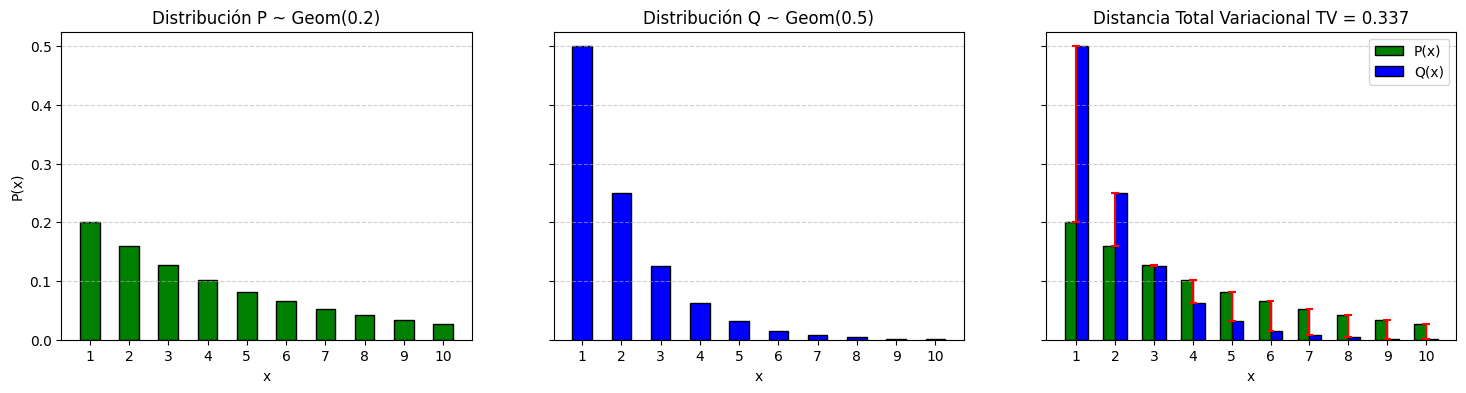

In [2]:
# Definimos los Parametros de las Distribucciones

p1 = 0.2
p2 = 0.5

# Definimos el Dominio

x = np.arange(1, 11)

# Definimos las Distribucciones

P = geom.pmf(x, p1)
Q = geom.pmf(x, p2)

# Calculamos la Distancia Total Varacional

tv_distance = 0.5 * np.sum(np.abs(P - Q))

# Visualizamos

fig, axes = plt.subplots(1, 3, figsize = (18, 4), sharey = True)

axes[0].bar(x, P, color = 'green', edgecolor = 'black', width = 0.5)
axes[0].set_title(f'Distribución P ~ Geom({p1})')
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(x)')
axes[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axes[0].set_xticks(x)

axes[1].bar(x, Q, color = 'blue', edgecolor = 'black', width = 0.5)
axes[1].set_title(f'Distribución Q ~ Geom({p2})')
axes[1].set_xlabel('x')
axes[1].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axes[1].set_xticks(x)

axes[2].bar(x - 0.15, P, width = 0.3, label = 'P(x)', color = 'green', edgecolor = 'black')
axes[2].bar(x + 0.15, Q, width = 0.3, label = 'Q(x)', color = 'blue', edgecolor = 'black')

for i in range(len(x)):
    
    x_pos = x[i]
    p_val = P[i]
    q_val = Q[i]
    
    low = min(p_val, q_val)
    high = max(p_val, q_val)

    axes[2].plot([x_pos, x_pos], [low, high], color = 'red', linewidth = 1.5)

    cap_width = 0.1
    axes[2].hlines(y = low, xmin = x_pos - cap_width, xmax = x_pos + cap_width, color = 'red', linewidth = 1.5)
    axes[2].hlines(y = high, xmin = x_pos - cap_width, xmax = x_pos + cap_width, color = 'red', linewidth = 1.5)

axes[2].set_title(f'Distancia Total Variacional TV = {tv_distance:.3f}')
axes[2].set_xlabel('x')
axes[2].set_xticks(x)
axes[2].legend()
axes[2].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)

plt.show()

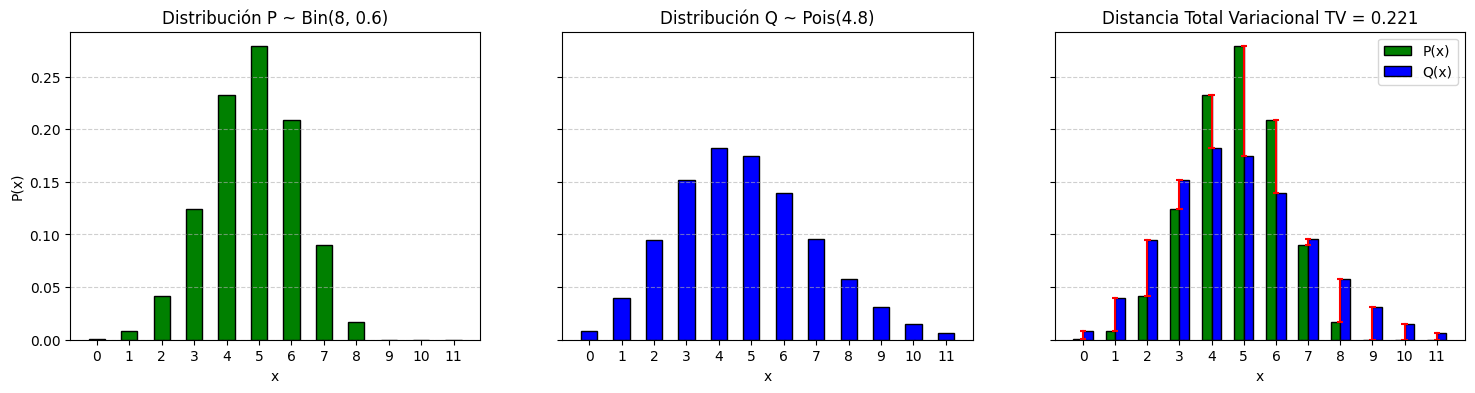

In [3]:
# Definimos los Parametros de las Distribucciones

n = 8 
p = 0.6
lambda_ = n * p

# Definimos el Dominio

x = np.arange(0, 12)

# Definimos las Distribucciones

P = binom.pmf(x, n, p)
Q = poisson.pmf(x, lambda_)

# Calculamos la Distancia Total Varacional

tv_distance = 0.5 * np.sum(np.abs(P - Q))

# Visualizamos

fig, axes = plt.subplots(1, 3, figsize = (18, 4), sharey = True)

axes[0].bar(x, P, color = 'green', edgecolor = 'black', width = 0.5)
axes[0].set_title(f'Distribución P ~ Bin({n}, {p})')
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(x)')
axes[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axes[0].set_xticks(x)

axes[1].bar(x, Q, color = 'blue', edgecolor = 'black', width = 0.5)
axes[1].set_title(f'Distribución Q ~ Pois({lambda_})')
axes[1].set_xlabel('x')
axes[1].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axes[1].set_xticks(x)

axes[2].bar(x - 0.15, P, width = 0.3, label = 'P(x)', color = 'green', edgecolor = 'black')
axes[2].bar(x + 0.15, Q, width = 0.3, label = 'Q(x)', color = 'blue', edgecolor = 'black')

for i in range(len(x)):
    
    x_pos = x[i]
    p_val = P[i]
    q_val = Q[i]
    
    low = min(p_val, q_val)
    high = max(p_val, q_val)

    axes[2].plot([x_pos, x_pos], [low, high], color = 'red', linewidth = 1.5)

    cap_width = 0.1
    axes[2].hlines(y = low, xmin = x_pos - cap_width, xmax = x_pos + cap_width, color = 'red', linewidth = 1.5)
    axes[2].hlines(y = high, xmin = x_pos - cap_width, xmax = x_pos + cap_width, color = 'red', linewidth = 1.5)

axes[2].set_title(f'Distancia Total Variacional TV = {tv_distance:.3f}')
axes[2].set_xlabel('x')
axes[2].set_xticks(x)
axes[2].legend()
axes[2].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)

plt.show()

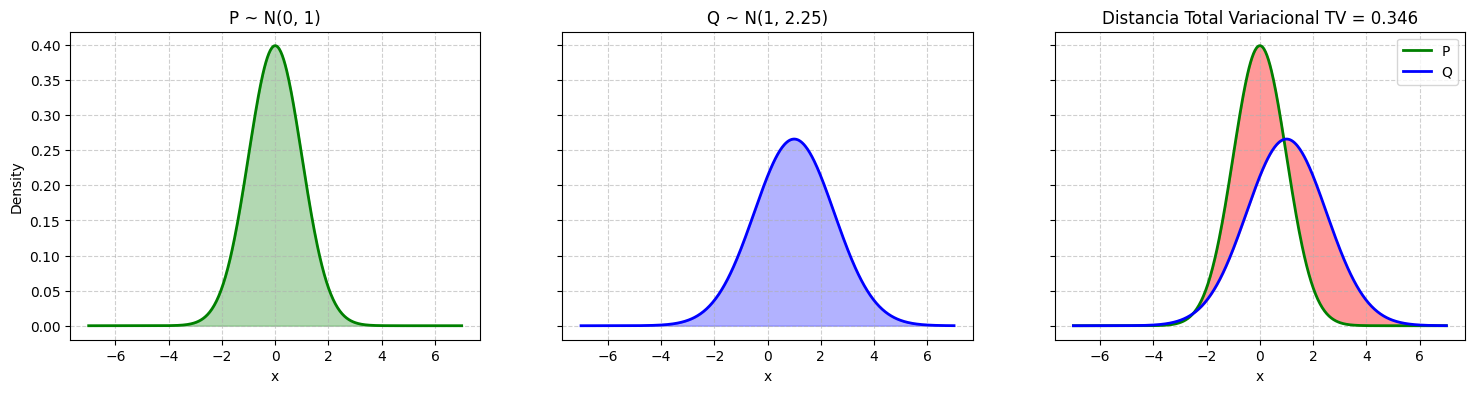

In [4]:
# Definimos los Parametros de las Distribucciones

mu1, sigma1 = 0, 1
mu2, sigma2 = 1, 1.5

# Definimos el Dominio

x = np.linspace(-7, 7, 500)

# Definimos las Distribucciones

P = norm.pdf(x, mu1, sigma1)
Q = norm.pdf(x, mu2, sigma2)

# Calculamos la Distancia Total Varacional

def difference(x):
    return abs(norm.pdf(x, mu1, sigma1) - norm.pdf(x, mu2, sigma2))

result, _ = integrate.quad(difference, a = -np.inf, b = np.inf)

tv_distance = 0.5 * result

# Visualizamos

fig, axes = plt.subplots(1, 3, figsize = (18, 4), sharey = True)

axes[0].plot(x, P, color = 'green', lw = 2)
axes[0].fill_between(x, 0, P, color = 'green', alpha = 0.3)
axes[0].set_title(f'P ~ N({mu1}, {sigma1**2})')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].grid(True, linestyle = '--', alpha = 0.6)

axes[1].plot(x, Q, color = 'blue', lw = 2)
axes[1].fill_between(x, 0, Q, color = 'blue', alpha = 0.3)
axes[1].set_title(f'Q ~ N({mu2}, {sigma2**2})')
axes[1].set_xlabel('x')
axes[1].grid(True, linestyle = '--', alpha = 0.6)

axes[2].plot(x, P, color = 'green', lw = 2, label = 'P')
axes[2].plot(x, Q, color = 'blue', lw = 2, label = 'Q')
axes[2].fill_between(x, P, Q, where = (P>Q), color = 'red', alpha = 0.4)
axes[2].fill_between(x, P, Q, where = (Q>=P), color = 'red', alpha = 0.4)
axes[2].set_title(f'Distancia Total Variacional TV = {tv_distance:.3f}')
axes[2].set_xlabel('x')
axes[2].legend()
axes[2].grid(True, linestyle = '--', alpha = 0.6)

plt.show()

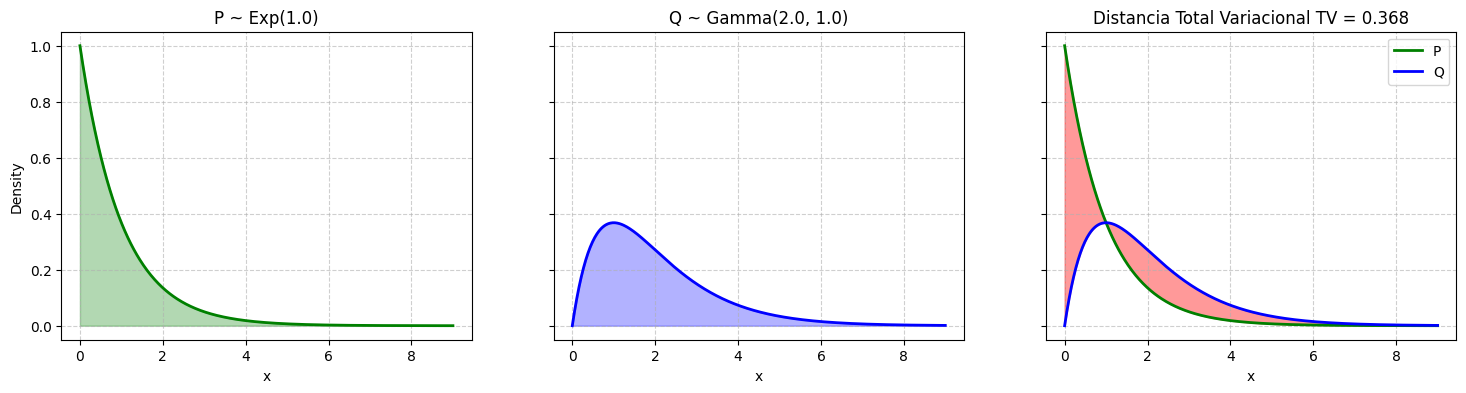

In [5]:
# Definimos los Parametros de las Distribucciones

lambda_ = 1.0 
k = 2.0              
theta = 1 / lambda_ 

# Definimos el Dominio

x = np.linspace(0, 9, 500)

# Definimos las Distribucciones

P = expon.pdf(x, scale = 1/lambda_) 
Q = gamma.pdf(x, a = k, scale = theta)

# Calculamos la Distancia Total Varacional

def difference(x):
    return abs(expon.pdf(x, scale = 1/lambda_)  - gamma.pdf(x, a = k, scale = theta))

result, _ = integrate.quad(difference, a = 0, b = np.inf)

tv_distance = 0.5 * result

# Visualizamos

fig, axes = plt.subplots(1, 3, figsize = (18, 4), sharey = True)

axes[0].plot(x, P, color = 'green', lw = 2)
axes[0].fill_between(x, 0, P, color = 'green', alpha = 0.3)
axes[0].set_title(f'P ~ Exp({lambda_})')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].grid(True, linestyle = '--', alpha = 0.6)

axes[1].plot(x, Q, color = 'blue', lw = 2)
axes[1].fill_between(x, 0, Q, color = 'blue', alpha = 0.3)
axes[1].set_title(f'Q ~ Gamma({k}, {theta})')
axes[1].set_xlabel('x')
axes[1].grid(True, linestyle = '--', alpha = 0.6)

axes[2].plot(x, P, color = 'green', lw = 2, label = 'P')
axes[2].plot(x, Q, color = 'blue', lw = 2, label = 'Q')
axes[2].fill_between(x, P, Q, where = (P>Q), color = 'red', alpha = 0.4)
axes[2].fill_between(x, P, Q, where = (Q>=P), color = 'red', alpha = 0.4)
axes[2].set_title(f'Distancia Total Variacional TV = {tv_distance:.3f}')
axes[2].set_xlabel('x')
axes[2].legend()
axes[2].grid(True, linestyle = '--', alpha = 0.6)

plt.show()

# **Divergencia Kullback Leiber** 

La **divergencia KL** mide cuánto **se diferencia** una distribución $Q$ de la distribución real $P$. Es el exceso de **sorpresa promedio** si usamos $Q$ en lugar de $P$, asumiendo que los datos en realidad siguen $P$.

* **Distribuciones Discretas**

$$D_{KL}(P \mid\mid Q) = \sum_i P(X = i) \cdot \log\frac{P(X = x)}{Q(X = x)}$$

* **Distribuciones Continuas** 

$$D_{KL}(P \mid\mid Q) = \int_{-\infty}^{\infty} p(x) \cdot \log\frac{p(x)}{q(x)} \hspace{0.1cm} dx$$

Tambien se puede interpretar como **el valor esperado del logaritmo del cociente entre las distribucciones**
 
$$D_{KL}(P \mid\mid Q) = E_{x \sim P} \left[\log\frac{P(X = x)}{Q(X = x)}\right]$$

**Propiedades** 

* **No negatividad**: $D_{KL}(P \mid\mid Q) \geq 0$

* **Asimetrica**: $D_{KL}(P \mid\mid Q) \neq D_{KL}(Q \mid\mid P)$

* $D_{KL}(P \mid\mid Q) = 0$ si solo si $P = Q$

**Nota:** Nos indica **cuánta información adicional** necesitamos para describir **datos generados** por $P$ si usamos $Q$ como modelo.

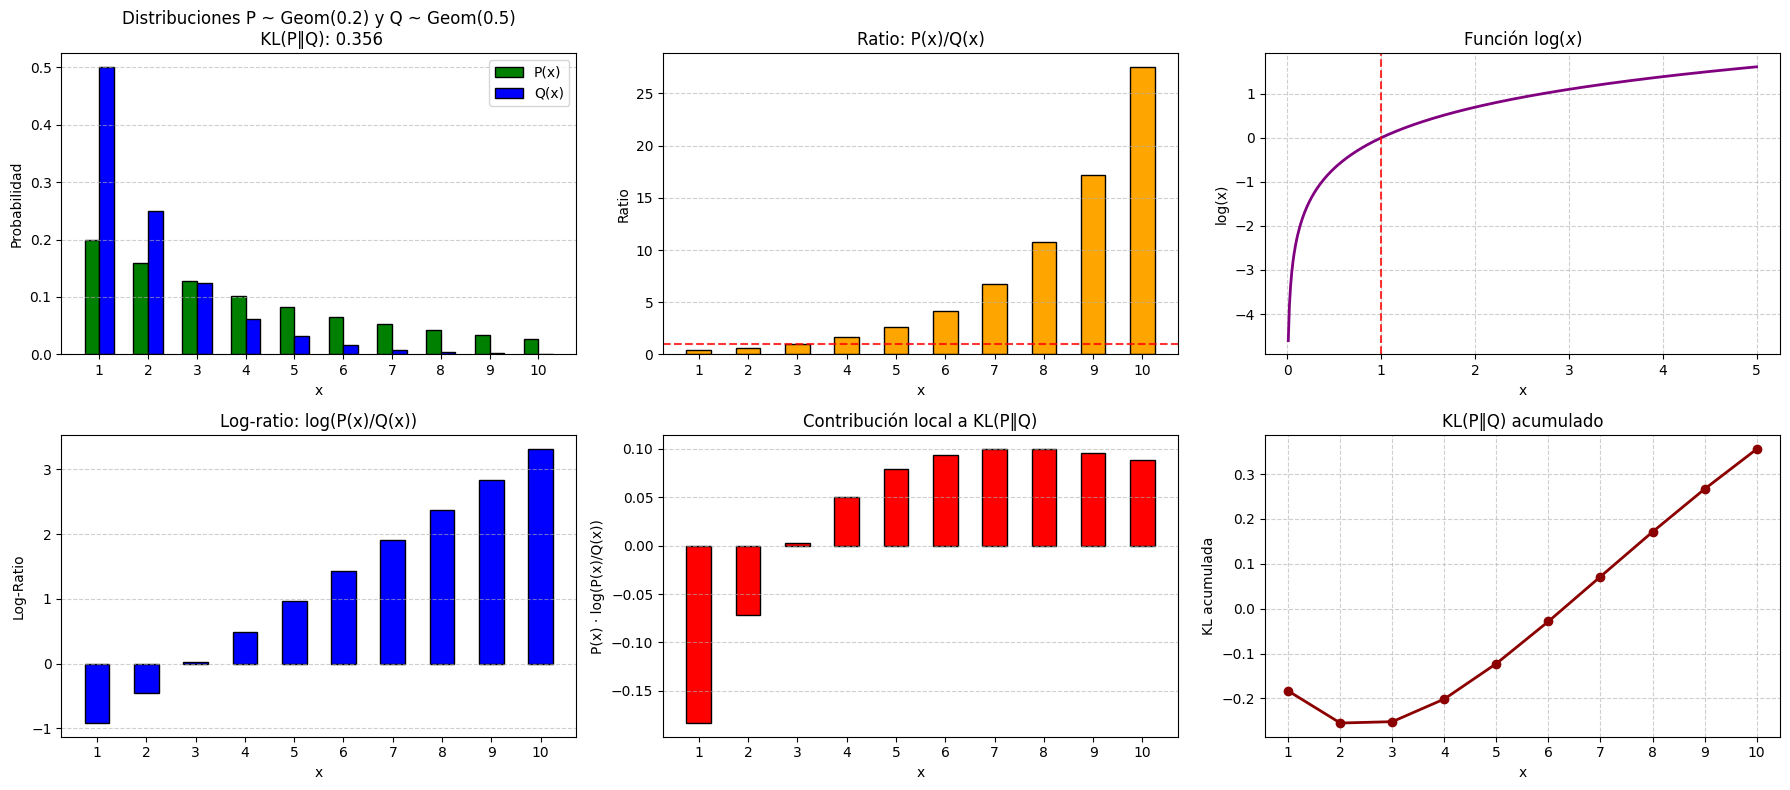

In [6]:
# Definimos los Parametros de las Distribucciones

p1 = 0.2
p2 = 0.5

# Definimos el Dominio

x = np.arange(1, 11)

# Definimos las Distribucciones

P = geom.pmf(x, p1)
Q = geom.pmf(x, p2)

# Divergencia

with np.errstate(divide = 'ignore', invalid = 'ignore'):
    ratio = np.where(Q > 0, P / Q, np.nan)
    log_ratio = np.where((P > 0) & (Q > 0), np.log(P / Q), 0)
    kl_local = np.where((P > 0) & (Q > 0), P * np.log(P / Q), 0)    

kl = sum(kl_local)

# Funcion Logarimo Natural 

x_log = np.linspace(0.01, 5, 400)
y_log = np.log(x_log)

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 8))

axs[0, 0].bar(x - 0.15, P, width = 0.3, label = 'P(x)', color = 'green', edgecolor = 'black')
axs[0, 0].bar(x + 0.15, Q, width = 0.3, label = 'Q(x)', color = 'blue', edgecolor = 'black')
axs[0, 0].set_title(f'Distribuciones P ~ Geom({p1}) y Q ~ Geom({p2})\n KL(P‖Q): {kl:0.3f}')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Probabilidad')
axs[0, 0].legend()
axs[0, 0].set_xticks(x)
axs[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)

axs[0, 1].bar(x, ratio, color = 'orange', edgecolor = 'black', width = 0.5)
axs[0, 1].axhline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 1].set_title('Ratio: P(x)/Q(x)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Ratio')
axs[0, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axs[0, 1].set_xticks(x)

axs[0, 2].plot(x_log, y_log, color = 'purple', lw = 2)
axs[0, 2].axvline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 2].set_title(r'Función $\log(x)$')
axs[0, 2].set_xlabel('x')
axs[0, 2].set_ylabel('log(x)')
axs[0, 2].grid(True, linestyle='--', alpha=0.6)

axs[1, 0].bar(x, log_ratio, color = 'blue', edgecolor = 'black', width = 0.5)
axs[1, 0].set_title('Log-ratio: log(P(x)/Q(x))')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Log-Ratio')
axs[1, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axs[1, 0].set_xticks(x)

axs[1, 1].bar(x, kl_local, color = 'red', edgecolor = 'black', width = 0.5)
axs[1, 1].set_title('Contribución local a KL(P‖Q)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('P(x) · log(P(x)/Q(x))')
axs[1, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axs[1, 1].set_xticks(x)

axs[1, 2].plot(x, np.cumsum(kl_local), marker = 'o', color = 'darkred', lw = 2)
axs[1, 2].set_title('KL(P‖Q) acumulado')
axs[1, 2].set_xlabel('x')
axs[1, 2].set_ylabel('KL acumulada')
axs[1, 2].grid(True, linestyle = '--', alpha = 0.6)
axs[1, 2].set_xticks(x)

plt.tight_layout()
plt.show()

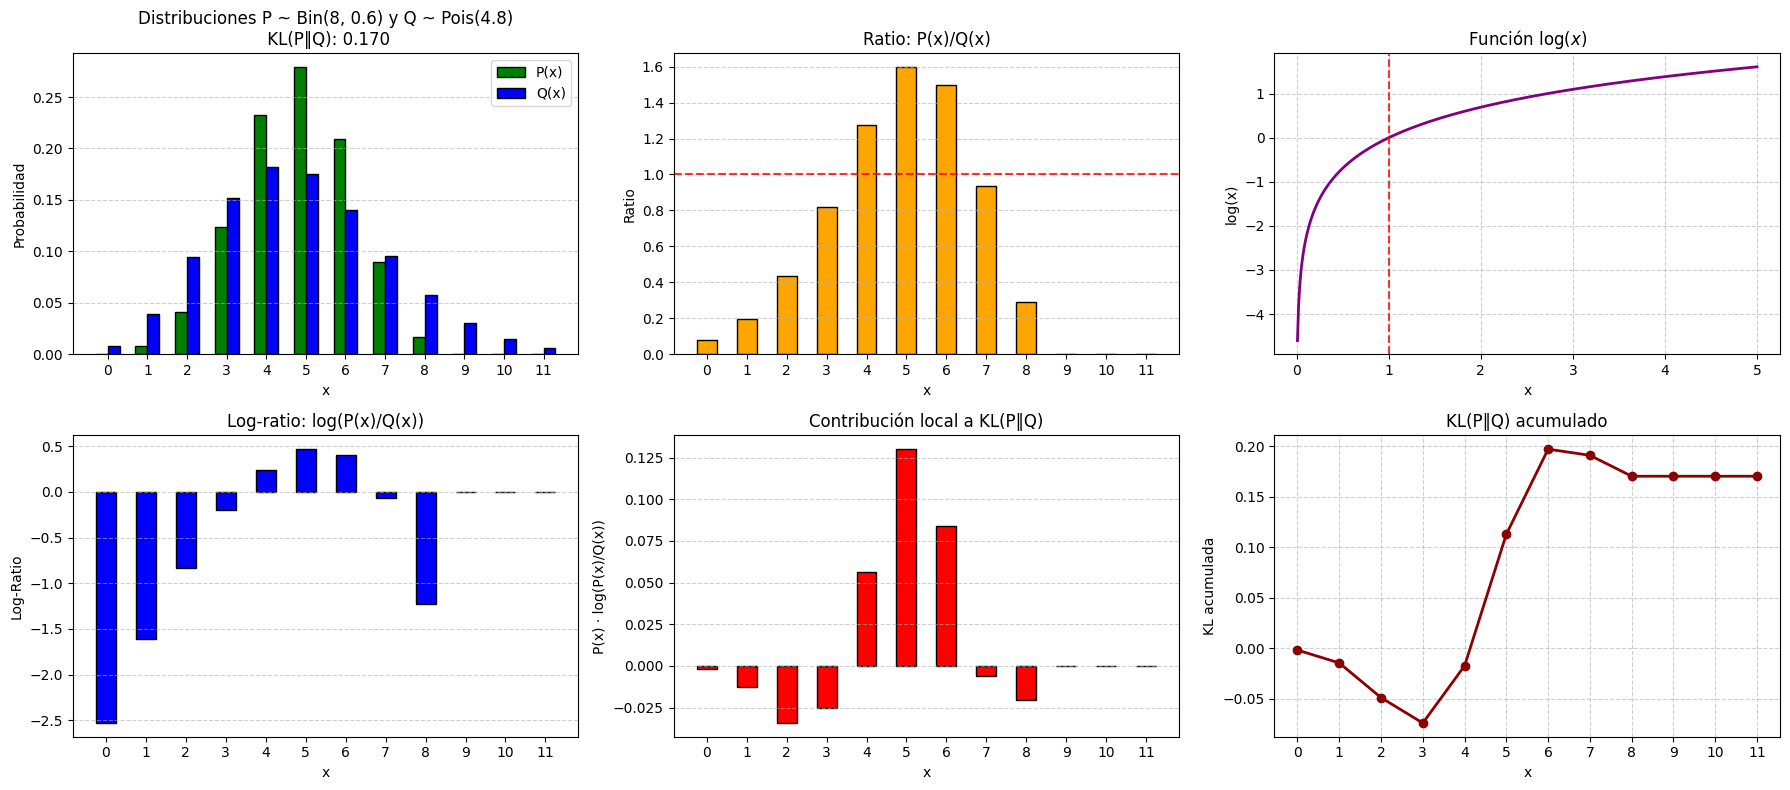

In [7]:
# Definimos los Parametros de las Distribucciones

n = 8 
p = 0.6
lambda_ = n * p

# Definimos el Dominio

x = np.arange(0, 12)

# Definimos las Distribucciones

P = binom.pmf(x, n, p)
Q = poisson.pmf(x, lambda_)

# Divergencia

with np.errstate(divide = 'ignore', invalid = 'ignore'):
    ratio = np.where(Q > 0, P / Q, np.nan)
    log_ratio = np.where((P > 0) & (Q > 0), np.log(P / Q), 0)
    kl_local = np.where((P > 0) & (Q > 0), P * np.log(P / Q), 0)    

kl = sum(kl_local)

# Funcion Logarimo Natural 

x_log = np.linspace(0.01, 5, 400)
y_log = np.log(x_log)

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 8))

axs[0, 0].bar(x - 0.15, P, width = 0.3, label = 'P(x)', color = 'green', edgecolor = 'black')
axs[0, 0].bar(x + 0.15, Q, width = 0.3, label = 'Q(x)', color = 'blue', edgecolor = 'black')
axs[0, 0].set_title(f'Distribuciones P ~ Bin({n}, {p}) y Q ~ Pois({lambda_})\n KL(P‖Q): {kl:0.3f}')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Probabilidad')
axs[0, 0].legend()
axs[0, 0].set_xticks(x)
axs[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)

axs[0, 1].bar(x, ratio, color = 'orange', edgecolor = 'black', width = 0.5)
axs[0, 1].axhline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 1].set_title('Ratio: P(x)/Q(x)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Ratio')
axs[0, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axs[0, 1].set_xticks(x)

axs[0, 2].plot(x_log, y_log, color = 'purple', lw = 2)
axs[0, 2].axvline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 2].set_title(r'Función $\log(x)$')
axs[0, 2].set_xlabel('x')
axs[0, 2].set_ylabel('log(x)')
axs[0, 2].grid(True, linestyle='--', alpha=0.6)

axs[1, 0].bar(x, log_ratio, color = 'blue', edgecolor = 'black', width = 0.5)
axs[1, 0].set_title('Log-ratio: log(P(x)/Q(x))')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Log-Ratio')
axs[1, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axs[1, 0].set_xticks(x)

axs[1, 1].bar(x, kl_local, color = 'red', edgecolor = 'black', width = 0.5)
axs[1, 1].set_title('Contribución local a KL(P‖Q)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('P(x) · log(P(x)/Q(x))')
axs[1, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.6)
axs[1, 1].set_xticks(x)

axs[1, 2].plot(x, np.cumsum(kl_local), marker = 'o', color = 'darkred', lw = 2)
axs[1, 2].set_title('KL(P‖Q) acumulado')
axs[1, 2].set_xlabel('x')
axs[1, 2].set_ylabel('KL acumulada')
axs[1, 2].grid(True, linestyle = '--', alpha = 0.6)
axs[1, 2].set_xticks(x)

plt.tight_layout()
plt.show()

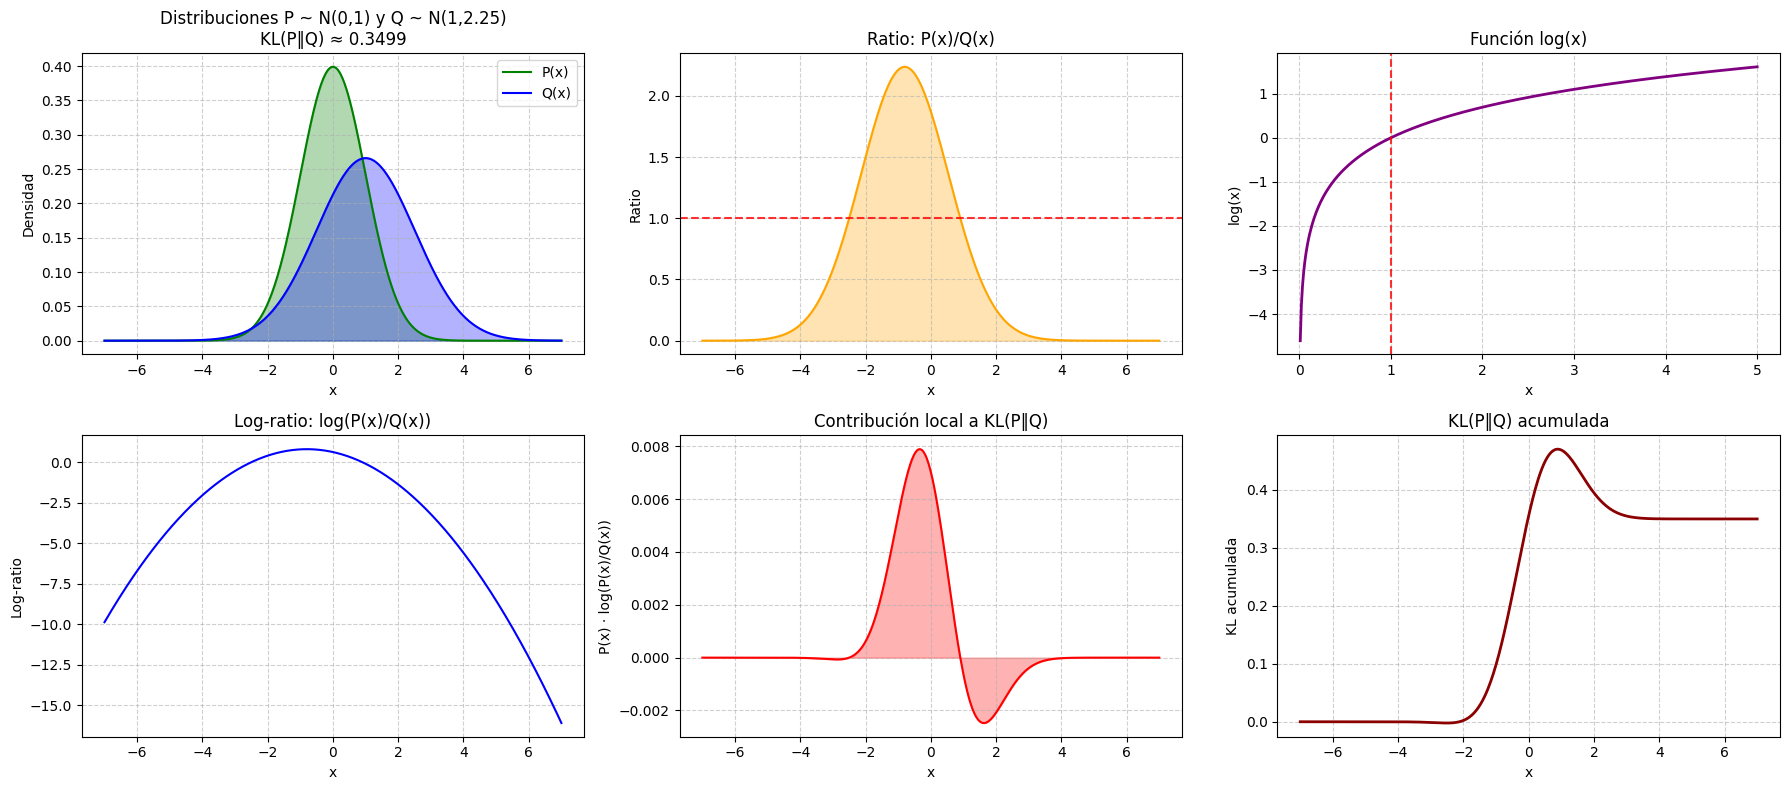

In [8]:
# Definimos los Parametros de las Distribucciones

mu1, sigma1 = 0, 1
mu2, sigma2 = 1, 1.5

# Definimos el Dominio

x = np.linspace(-7, 7, 500)

# Definimos las Distribucciones

P = norm.pdf(x, mu1, sigma1)
Q = norm.pdf(x, mu2, sigma2)

# Divergencia

def kl_integrand(x):
    
    p = norm.pdf(x, mu1, sigma1)
    q = norm.pdf(x, mu2, sigma2)
    
    if p == 0 or q == 0:
        return 0
    
    return p * np.log(p / q)

dx = x[1] - x[0]

with np.errstate(divide = 'ignore', invalid = 'ignore'):
    ratio = np.where(Q > 0, P / Q, np.nan)
    log_ratio = np.where((P > 0) & (Q > 0), np.log(P / Q), 0)
    kl_local = np.where((P > 0) & (Q > 0), P * np.log(P / Q) * dx, 0)    

kl, _ = integrate.quad(kl_integrand, a = -np.inf, b = np.inf)

# Funcion Logarimo Natural 

x_log = np.linspace(0.01, 5, 400)
y_log = np.log(x_log)

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 8))

axs[0, 0].plot(x, P, color = 'green', label='P(x)')
axs[0, 0].plot(x, Q, color = 'blue', label='Q(x)')
axs[0, 0].fill_between(x, P, color = 'green', alpha = 0.3)
axs[0, 0].fill_between(x, Q, color = 'blue', alpha = 0.3)
axs[0, 0].set_title(f'Distribuciones P ~ N({mu1},{sigma1**2}) y Q ~ N({mu2},{sigma2**2})\nKL(P‖Q) ≈ {kl:.4f}')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Densidad')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle = '--', alpha = 0.6)

axs[0, 1].plot(x, ratio, color = 'orange')
axs[0, 1].fill_between(x, ratio, color = 'orange', alpha = 0.3)
axs[0, 1].axhline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 1].set_title('Ratio: P(x)/Q(x)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Ratio')
axs[0, 1].grid(True, linestyle = '--', alpha = 0.6)

axs[0, 2].plot(x_log, y_log, color = 'purple', lw = 2)
axs[0, 2].axvline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 2].set_title('Función log(x)')
axs[0, 2].set_xlabel('x')
axs[0, 2].set_ylabel('log(x)')
axs[0, 2].grid(True, linestyle = '--', alpha = 0.6)

axs[1, 0].plot(x, log_ratio, color = 'blue')
axs[1, 0].set_title('Log-ratio: log(P(x)/Q(x))')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Log-ratio')
axs[1, 0].grid(True, linestyle = '--', alpha = 0.6)

axs[1, 1].plot(x, kl_local, color = 'red')
axs[1, 1].fill_between(x, kl_local, color = 'red', alpha = 0.3)
axs[1, 1].set_title('Contribución local a KL(P‖Q)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('P(x) · log(P(x)/Q(x))')
axs[1, 1].grid(True, linestyle='--', alpha=0.6)

axs[1, 2].plot(x, np.cumsum(kl_local), color = 'darkred', lw = 2)
axs[1, 2].set_title('KL(P‖Q) acumulada')
axs[1, 2].set_xlabel('x')
axs[1, 2].set_ylabel('KL acumulada')
axs[1, 2].grid(True, linestyle='--', alpha = 0.6)

plt.tight_layout()
plt.show()

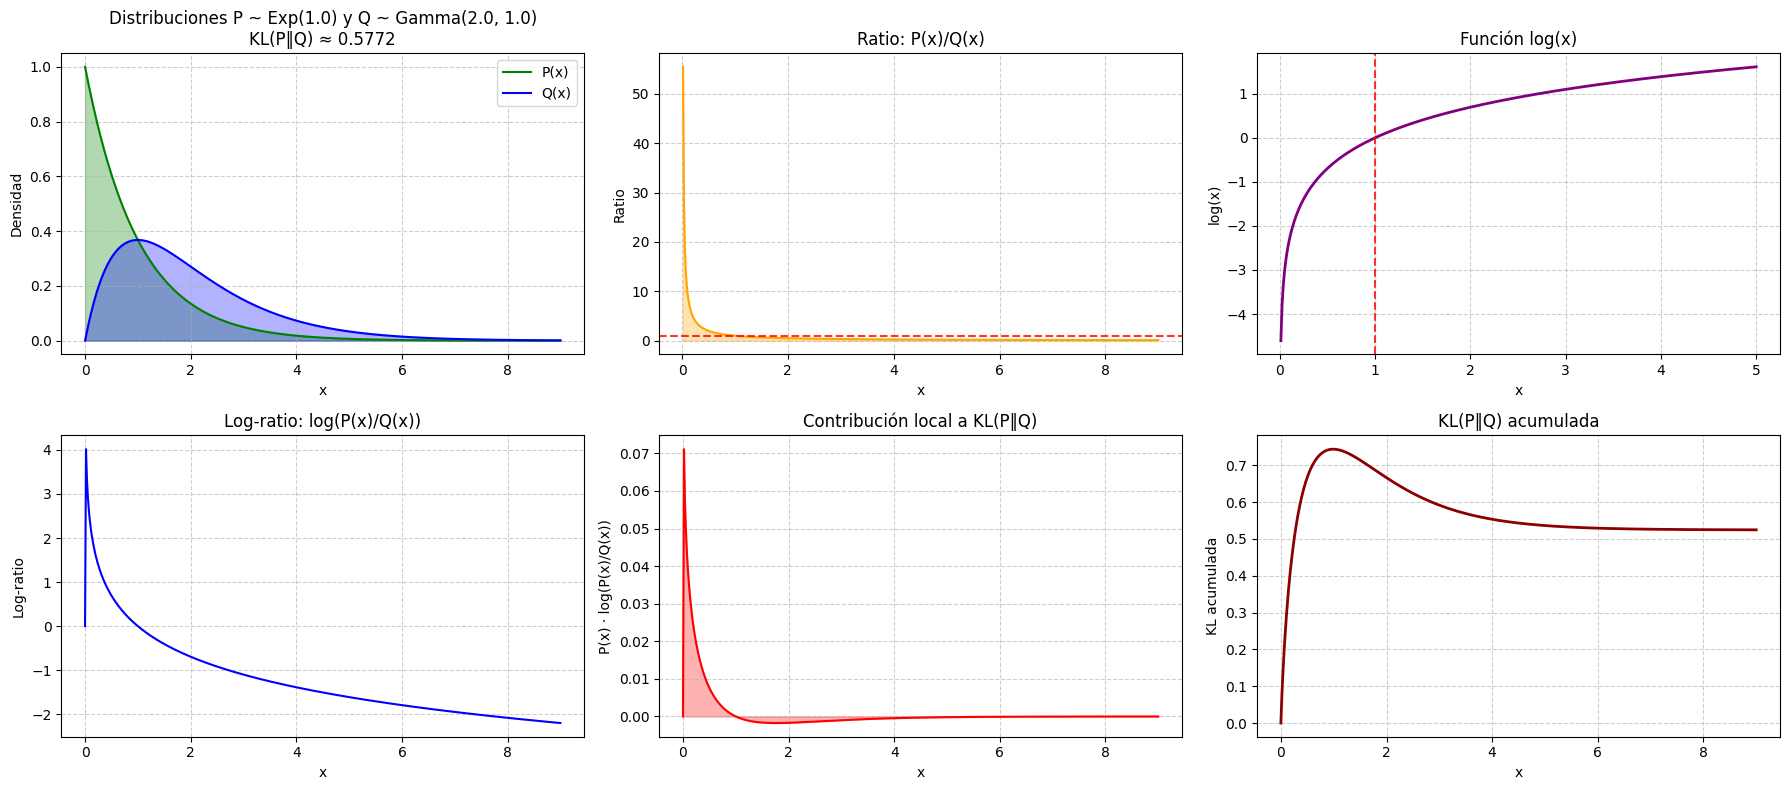

In [9]:
# Definimos los Parametros de las Distribucciones

lambda_ = 1.0 
k = 2.0              
theta = 1 / lambda_ 

# Definimos el Dominio

x = np.linspace(0, 9, 500)

# Definimos las Distribucciones

P = expon.pdf(x, scale = 1/lambda_) 
Q = gamma.pdf(x, a = k, scale = theta)

# Divergencia

def kl_integrand(x):
    
    p = expon.pdf(x, scale = 1/lambda_) 
    q = gamma.pdf(x, a = k, scale = theta)
    
    if p == 0 or q == 0:
        return 0
    
    return p * np.log(p / q)

dx = x[1] - x[0]

with np.errstate(divide = 'ignore', invalid = 'ignore'):
    ratio = np.where(Q > 0, P / Q, np.nan)
    log_ratio = np.where((P > 0) & (Q > 0), np.log(P / Q), 0)
    kl_local = np.where((P > 0) & (Q > 0), P * np.log(P / Q) * dx, 0)

kl, _ = integrate.quad(kl_integrand, a = 0, b = np.inf)

# Funcion Logarimo Natural 

x_log = np.linspace(0.01, 5, 400)
y_log = np.log(x_log)

# Visualizamos 

fig, axs = plt.subplots(2, 3, figsize = (18, 8))

axs[0, 0].plot(x, P, color = 'green', label='P(x)')
axs[0, 0].plot(x, Q, color = 'blue', label='Q(x)')
axs[0, 0].fill_between(x, P, color = 'green', alpha = 0.3)
axs[0, 0].fill_between(x, Q, color = 'blue', alpha = 0.3)
axs[0, 0].set_title(f'Distribuciones P ~ Exp({lambda_}) y Q ~ Gamma({k}, {theta})\nKL(P‖Q) ≈ {kl:.4f}')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Densidad')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle = '--', alpha = 0.6)

axs[0, 1].plot(x, ratio, color = 'orange')
axs[0, 1].fill_between(x, ratio, color = 'orange', alpha = 0.3)
axs[0, 1].axhline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 1].set_title('Ratio: P(x)/Q(x)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Ratio')
axs[0, 1].grid(True, linestyle = '--', alpha = 0.6)

axs[0, 2].plot(x_log, y_log, color = 'purple', lw = 2)
axs[0, 2].axvline(1, color = 'red', linestyle = '--', alpha = 0.8)
axs[0, 2].set_title('Función log(x)')
axs[0, 2].set_xlabel('x')
axs[0, 2].set_ylabel('log(x)')
axs[0, 2].grid(True, linestyle = '--', alpha = 0.6)

axs[1, 0].plot(x, log_ratio, color = 'blue')
axs[1, 0].set_title('Log-ratio: log(P(x)/Q(x))')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Log-ratio')
axs[1, 0].grid(True, linestyle = '--', alpha = 0.6)

axs[1, 1].plot(x, kl_local, color = 'red')
axs[1, 1].fill_between(x, kl_local, color = 'red', alpha = 0.3)
axs[1, 1].set_title('Contribución local a KL(P‖Q)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('P(x) · log(P(x)/Q(x))')
axs[1, 1].grid(True, linestyle='--', alpha = 0.6)

axs[1, 2].plot(x, np.cumsum(kl_local), color = 'darkred', lw = 2)
axs[1, 2].set_title('KL(P‖Q) acumulada')
axs[1, 2].set_xlabel('x')
axs[1, 2].set_ylabel('KL acumulada')
axs[1, 2].grid(True, linestyle='--', alpha = 0.6)

plt.tight_layout()
plt.show()

# **Earth Mover's Distance**

La **Earth Mover's Distance (EMD)** es una **medida de diferencia** entre dos distribuciones de probabilidad. Intuitivamente, representa el **costo mínimo** de transformar **una distribución en otra moviendo "masa"** (o tierra) entre posiciones.

$$EMD(P, Q) = \text{inf}_{\gamma \in \prod(P, Q)} \hspace{0.2cm} E_{x, y \sim \gamma} \left[d(x, y)\right] = \text{inf}_{\gamma \in \prod(P, Q)} \sum_x \sum_y \gamma(x, y) \cdot d(x, y)$$

**Nota:** El **costo** se define como la **cantidad de tierra movida** multiplicada por la **distancia** que necesita ser movida esa tierra

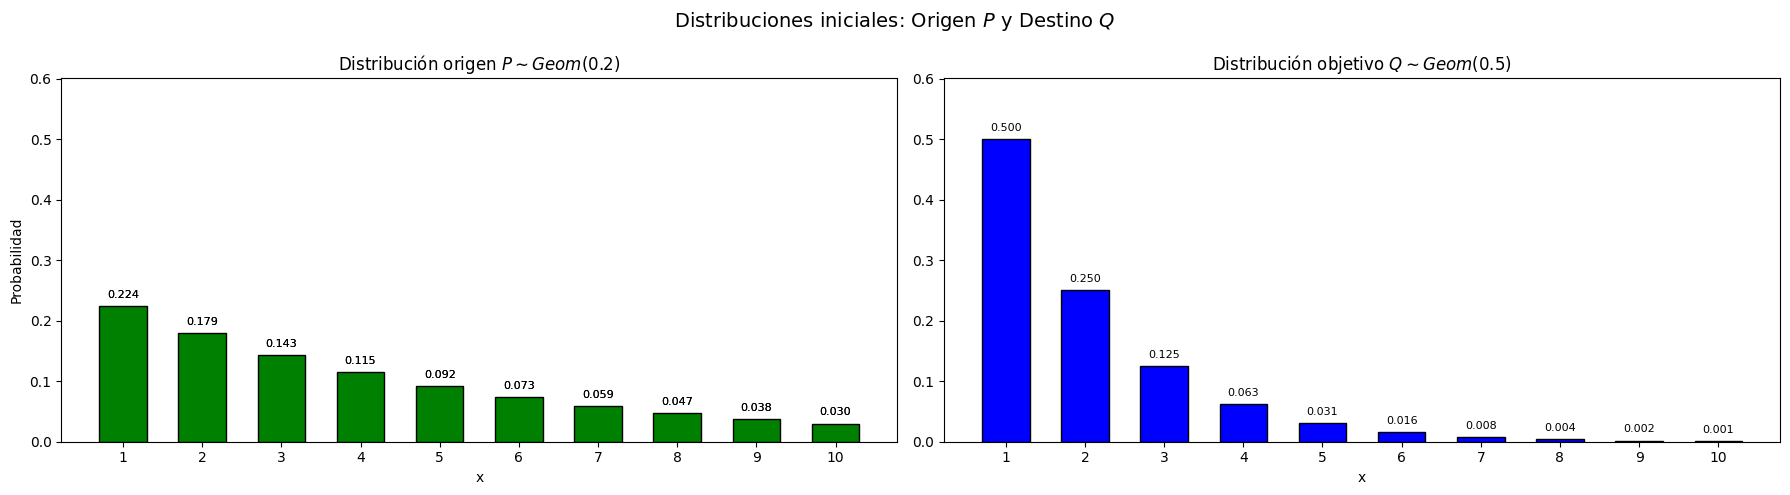

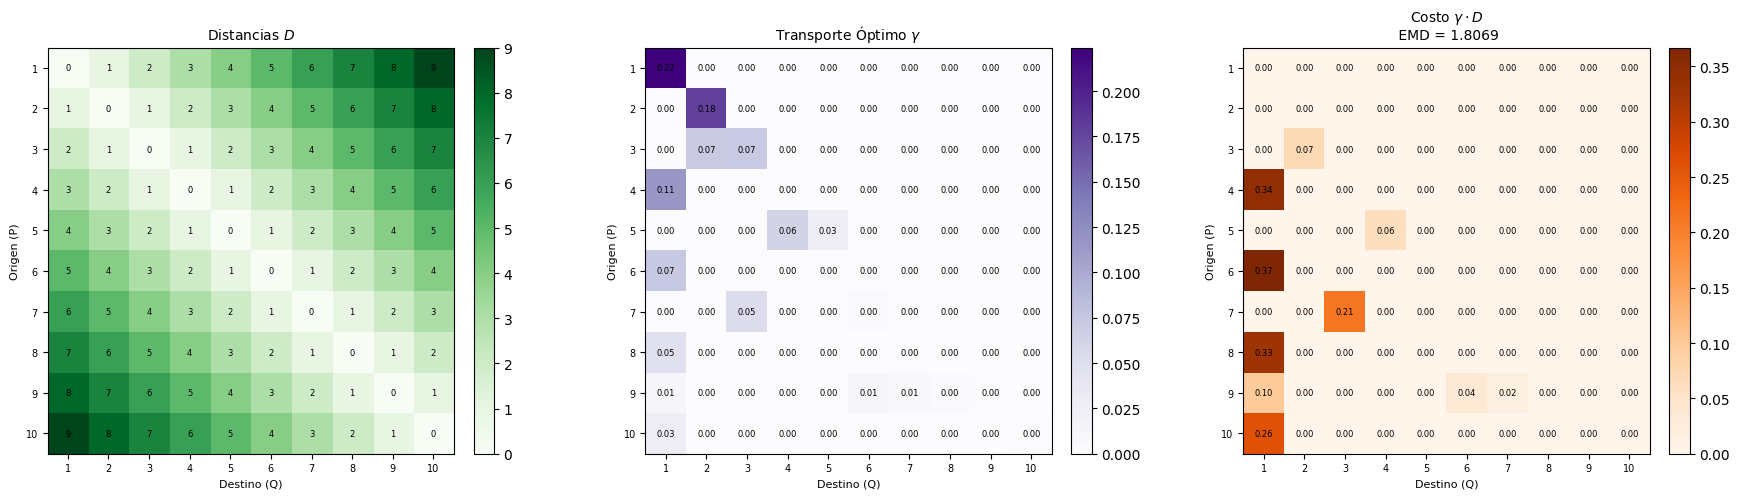

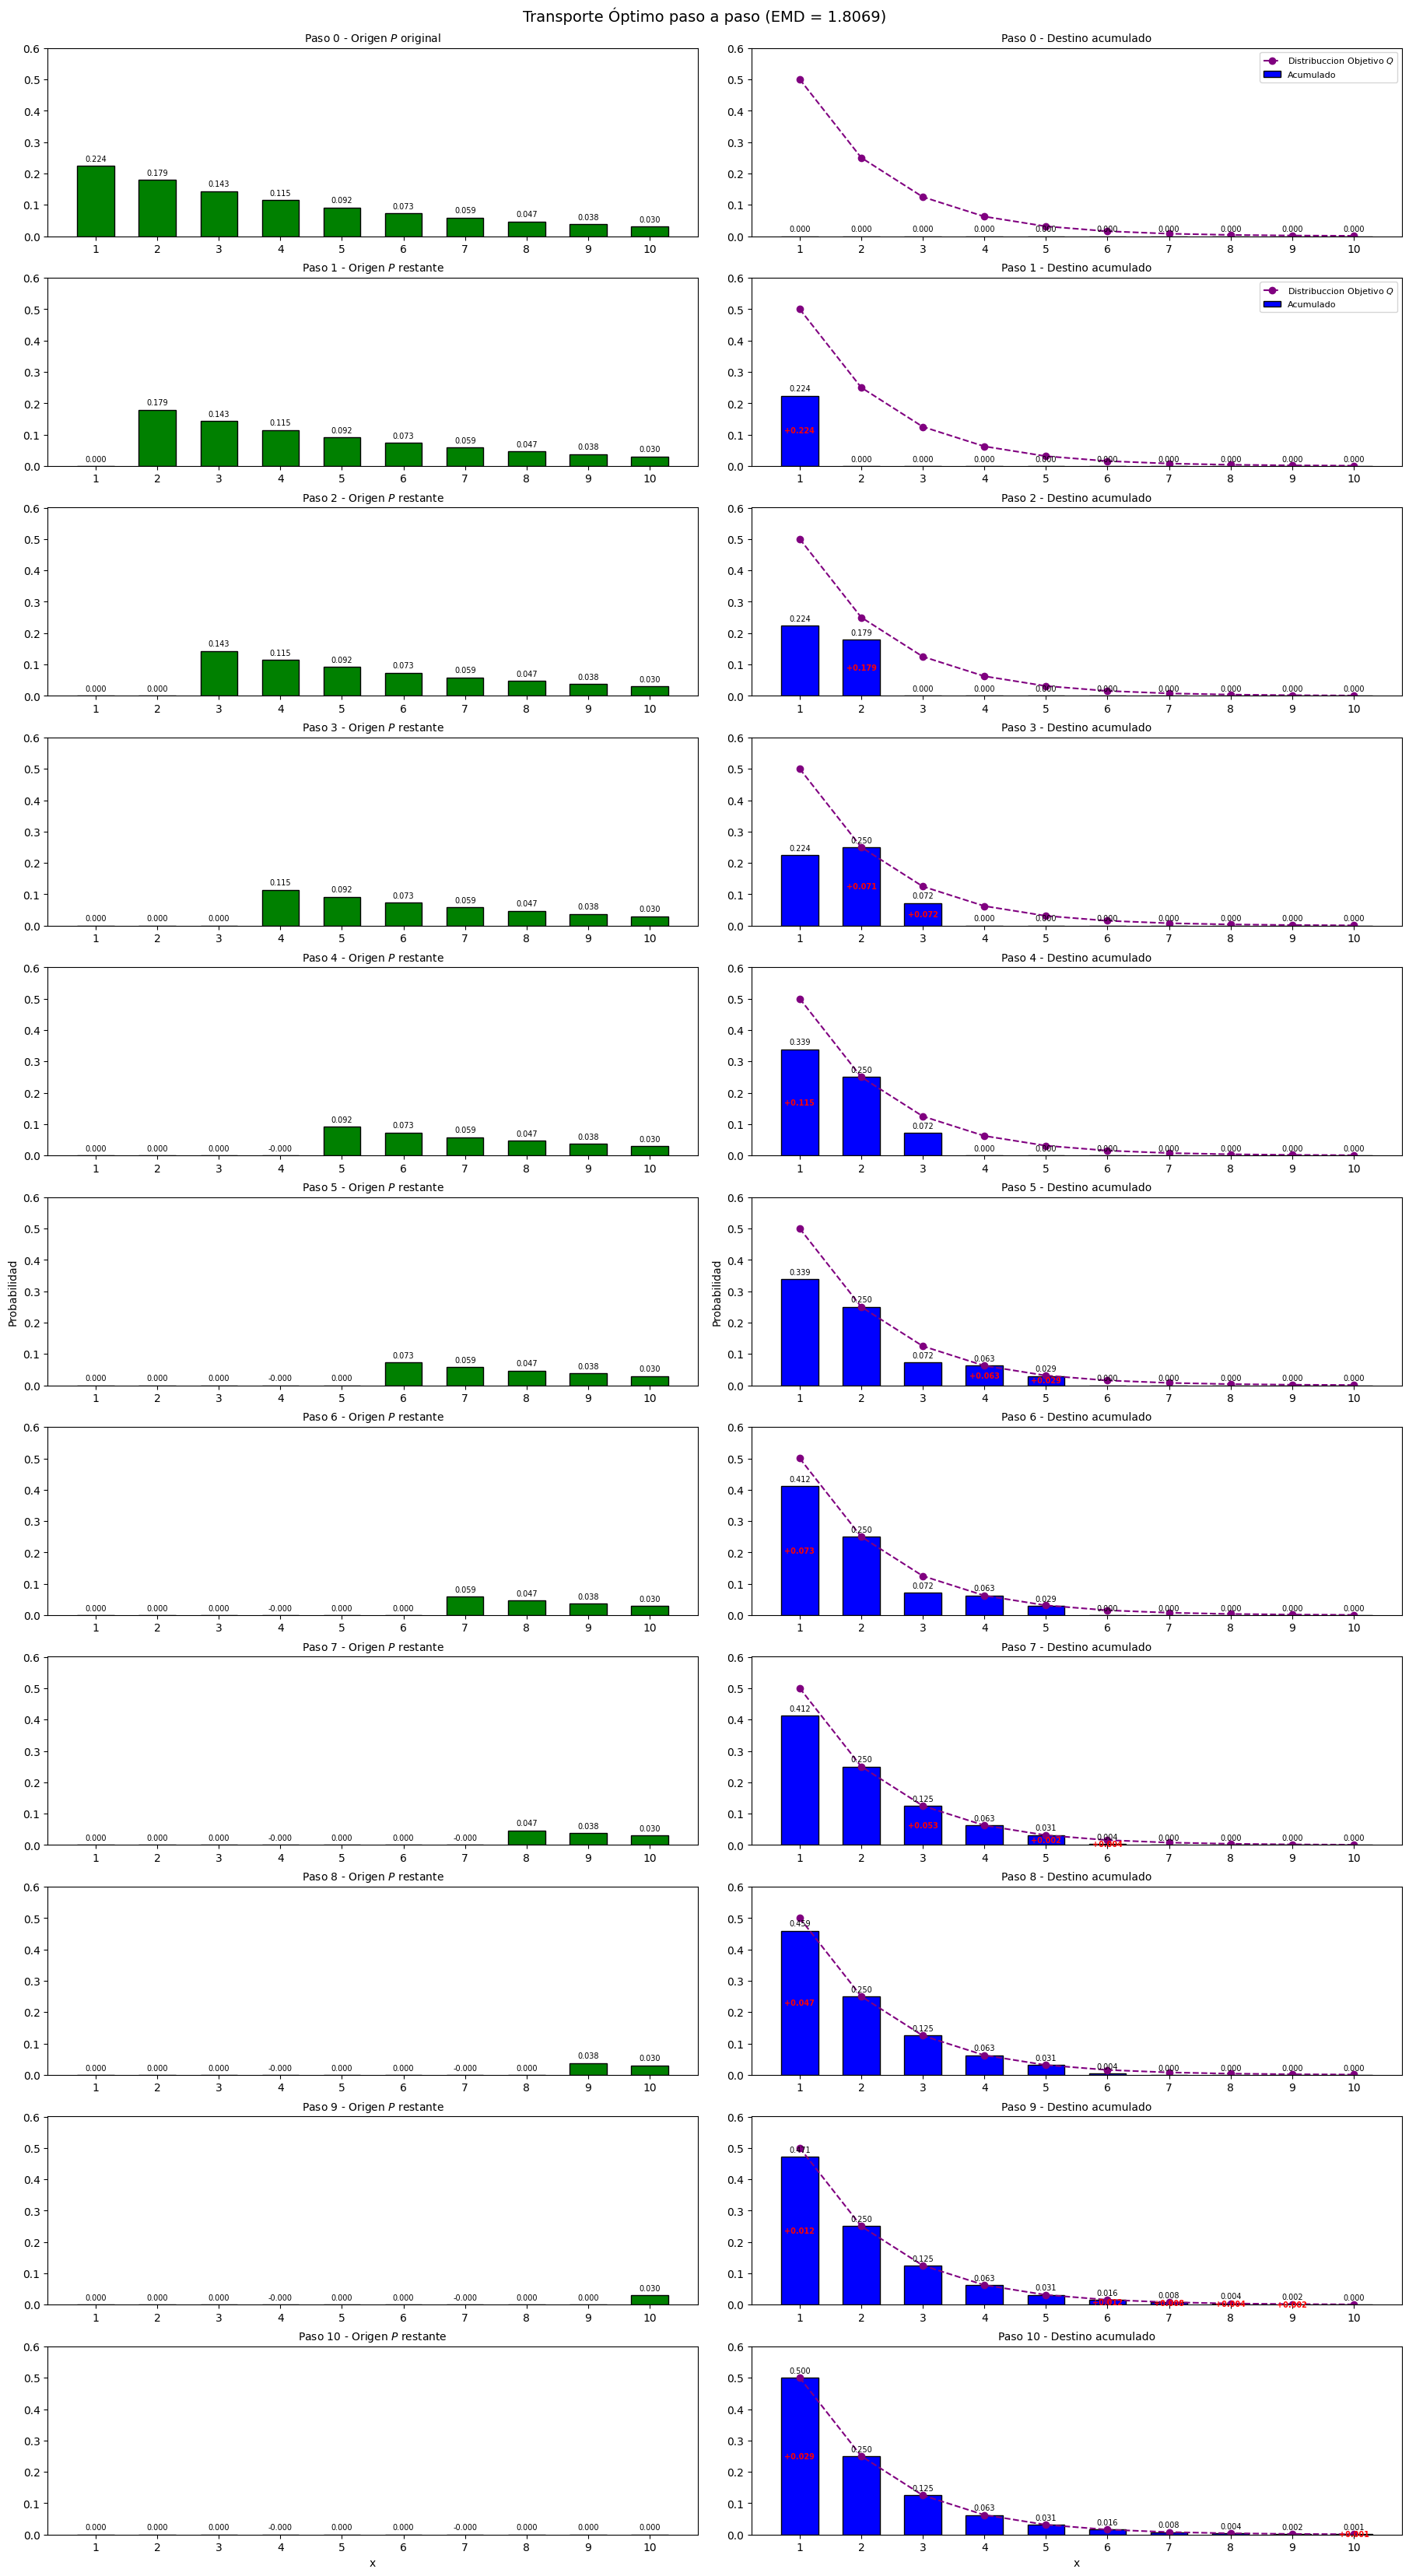

In [10]:
# Definimos los Parametros de las Distribucciones

p1 = 0.2
p2 = 0.5

# Definimos el Dominio

x = np.arange(1, 11)
n = len(x)

# Definimos las Distribucciones

P = geom.pmf(x, p1)
Q = geom.pmf(x, p2)

# Normalizamos Para que Sumen 1 (No extender tanto el Dominio)

P /= P.sum()
Q /= Q.sum()

# Definimos la Matriz de Distancia (Distancia Absoluta)

D = np.abs(x[:, None] - x[None, :])

# Calculamos el Transporte Optimo y la Earth Mover's Distance

gamma_opt = ot.emd(P, Q, D)
C_opt = gamma_opt * D
emd_opt = np.sum(C_opt)

# Visualizamos

fig0, ax0 = plt.subplots(1, 2, figsize = (18, 5))
bar_width = 0.6

ax0[0].bar(x, P, color = 'green', edgecolor = 'black', width = bar_width)
ax0[0].set_title(f"Distribución origen $P \sim Geom({p1})$", fontsize = 12)
ax0[0].set_ylim(0, max(P.max(), Q.max()) * 1.2)
ax0[0].set_xticks(x)

for j in range(n):
    ax0[0].text(x[j], P[j] + 0.01, f"{P[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 8)

ax0[1].bar(x, Q, color = 'blue', edgecolor = 'black', width = bar_width)
ax0[1].set_title(f"Distribución objetivo $Q \sim Geom({p2})$", fontsize = 12)
ax0[1].set_ylim(0, max(P.max(), Q.max()) * 1.2)
ax0[1].set_xticks(x)

for j in range(n):
    ax0[0].text(x[j], P[j] + 0.01, f"{P[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 8)
    
for j in range(n):
    ax0[1].text(x[j], Q[j] + 0.01, f"{Q[j]:.3f}", ha='center', va = 'bottom', fontsize = 8)

ax0[0].set_ylabel("Probabilidad")
ax0[0].set_xlabel("x")
ax0[1].set_xlabel("x")
plt.suptitle("Distribuciones iniciales: Origen $P$ y Destino $Q$", fontsize = 14)
plt.tight_layout()
plt.show()

def plot_matrix_with_values(matrix, title, ax, fmt = ".2f", cmap = "Blues"):
    
    im = ax.imshow(matrix, cmap = cmap)
    ax.set_title(title, fontsize = 10)
    ax.set_xlabel("Destino (Q)", fontsize = 8)
    ax.set_ylabel("Origen (P)", fontsize = 8)
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(x, fontsize = 7)
    ax.set_yticklabels(x, fontsize = 7)
    
    for i in range(n):
        for j in range(n):
            val = format(matrix[i, j], fmt)
            ax.text(j, i, val, ha = "center", va = "center", color = "black", fontsize = 6)
            
    plt.colorbar(im, ax = ax, fraction=0.046, pad=0.04)

fig2 = plt.figure(figsize = (18, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

ax0 = fig2.add_subplot(gs[0])
ax1 = fig2.add_subplot(gs[1])
ax2 = fig2.add_subplot(gs[2])

plot_matrix_with_values(D, "Distancias $D$", ax0, fmt=".0f", cmap = "Greens")
plot_matrix_with_values(gamma_opt, "Transporte Óptimo $\\gamma$", ax1, fmt = ".2f", cmap = "Purples")
plot_matrix_with_values(C_opt, f"Costo $\\gamma \\cdot D$\n EMD = {emd_opt:.4f}", ax2, fmt = ".2f", cmap = "Oranges")

plt.tight_layout()
plt.show()

P_remaining = P.copy()
Q_accum = np.zeros_like(Q)

fig3, axs = plt.subplots(n + 1, 2, figsize = (18, 3*(n+1)), constrained_layout = True)

axs[0, 0].bar(x, P, color = 'green', edgecolor = 'black', width = bar_width)
axs[0, 0].set_ylim(0, max(P.max(), Q.max()) * 1.2)
axs[0, 0].set_xticks(x)
axs[0, 0].set_title("Paso 0 - Origen $P$ original", fontsize = 10)

axs[0, 1].bar(x, Q_accum, color = 'blue', edgecolor = 'black', width = bar_width, label = "Acumulado")
axs[0, 1].plot(x, Q, marker = 'o', label = "Distribuccion Objetivo $Q$", color = 'purple', linestyle = '--')
axs[0, 1].set_ylim(0, max(P.max(), Q.max()) * 1.2)
axs[0, 1].set_xticks(x)
axs[0, 1].set_title("Paso 0 - Destino acumulado", fontsize = 10)

for j in range(n):
    axs[0, 0].text(x[j], P[j] + 0.01, f"{P[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
    
for j in range(n):
    axs[0, 1].text(x[j], Q_accum[j] + 0.01, f"{Q_accum[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
    
axs[0, 1].legend(fontsize = 8)

for i in range(n):
    transported = gamma_opt[i, :]
    Q_accum += transported
    P_remaining[i] -= transported.sum()
    P_remaining_step = P_remaining.copy()
    
    axs[i+1, 0].bar(x, P_remaining_step, color = 'green', edgecolor = 'black', width = bar_width)
    axs[i+1, 0].set_ylim(0, max(P.max(), Q.max()) * 1.2)
    axs[i+1, 0].set_xticks(x)
    axs[i+1, 0].set_title(f"Paso {i+1} - Origen $P$ restante", fontsize = 10)    
    
    axs[i+1, 1].bar(x, Q_accum, color = 'blue', edgecolor = 'black', width = bar_width, label = "Acumulado")
    axs[i+1, 1].plot(x, Q, marker = 'o', label = "Distribuccion Objetivo $Q$", color = 'purple', linestyle = '--')
    axs[i+1, 1].set_ylim(0, max(P.max(), Q.max()) * 1.2)
    axs[i+1, 1].set_xticks(x)
    axs[i+1, 1].set_title(f"Paso {i+1} - Destino acumulado", fontsize=10)
    
    for j in range(n):
        axs[i+1, 0].text(x[j], P_remaining_step[j] + 0.01, f"{P_remaining_step[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
        
    for j in range(n):
        axs[i+1, 1].text(x[j], Q_accum[j] + 0.01, f"{Q_accum[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
        
    for j in range(n):
        if transported[j] > 0:
            axs[i+1, 1].text(x[j], Q_accum[j]/2, f"+{transported[j]:.3f}", ha = 'center', va = 'center', fontsize = 7, color = 'red', fontweight = 'bold')
    if i == 0:
        axs[i+1, 1].legend(fontsize = 8)

axs[n//2, 0].set_ylabel("Probabilidad")
axs[n//2, 1].set_ylabel("Probabilidad")
axs[-1, 0].set_xlabel("x")
axs[-1, 1].set_xlabel("x")
plt.suptitle(f"Transporte Óptimo paso a paso (EMD = {emd_opt:.4f})", fontsize = 14)
plt.show()

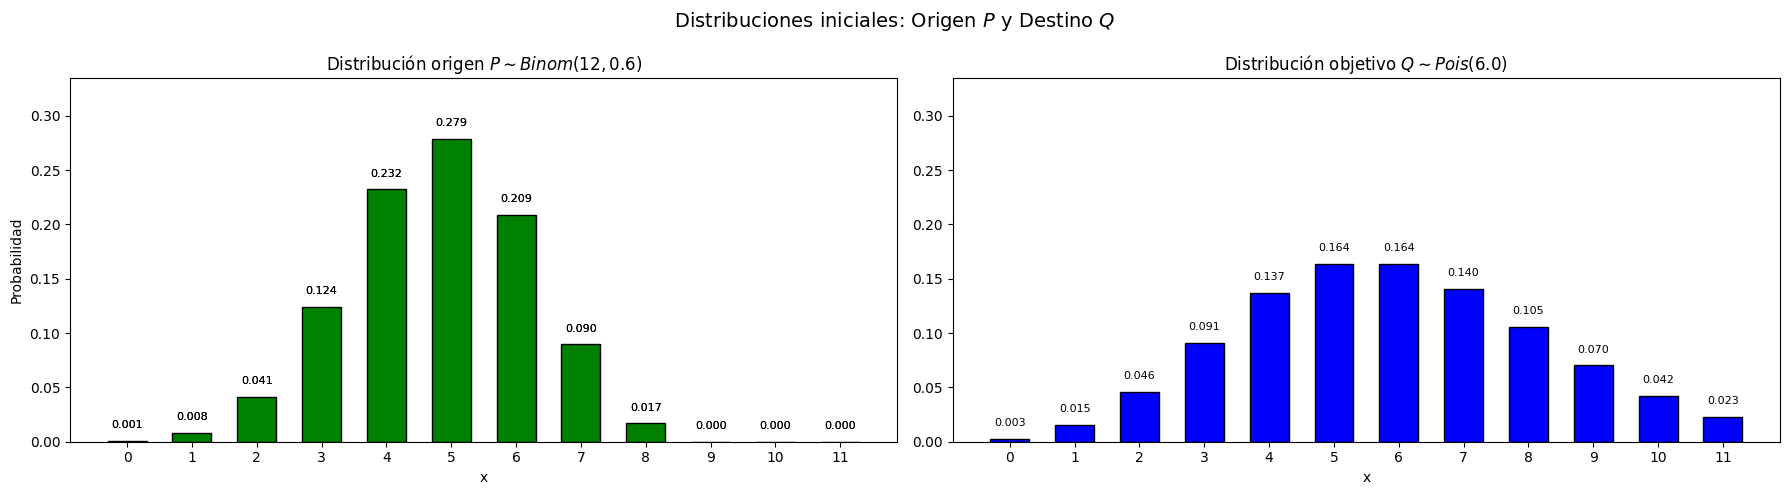

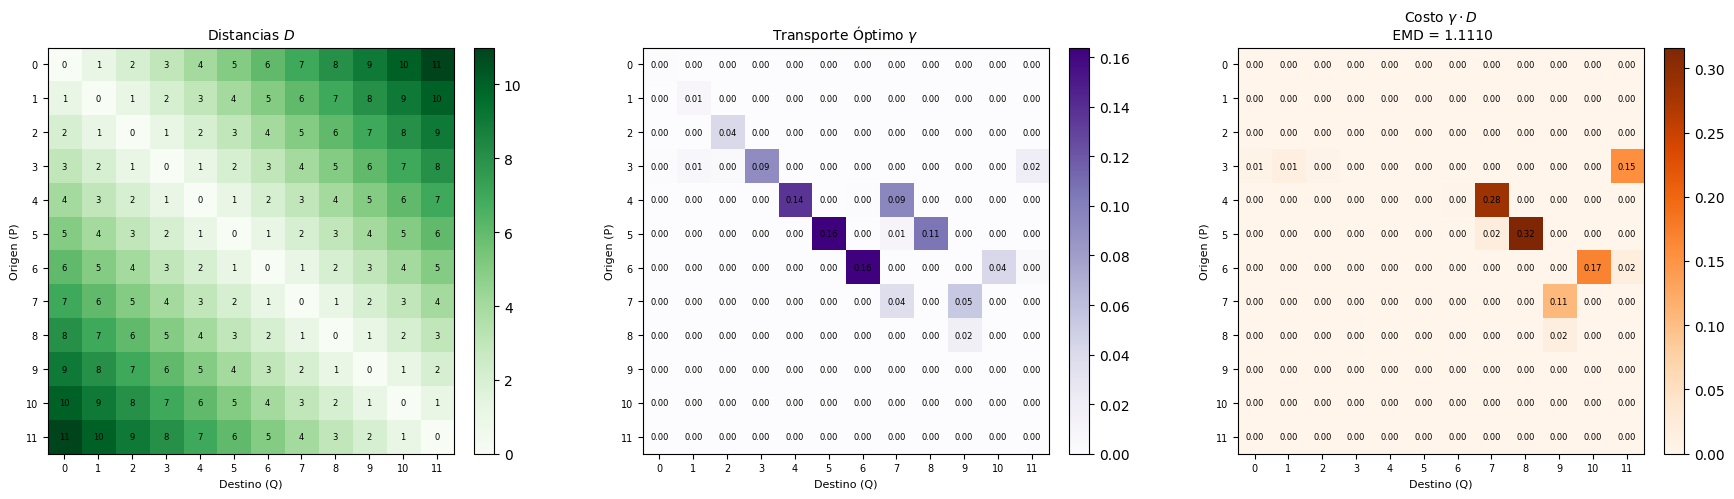

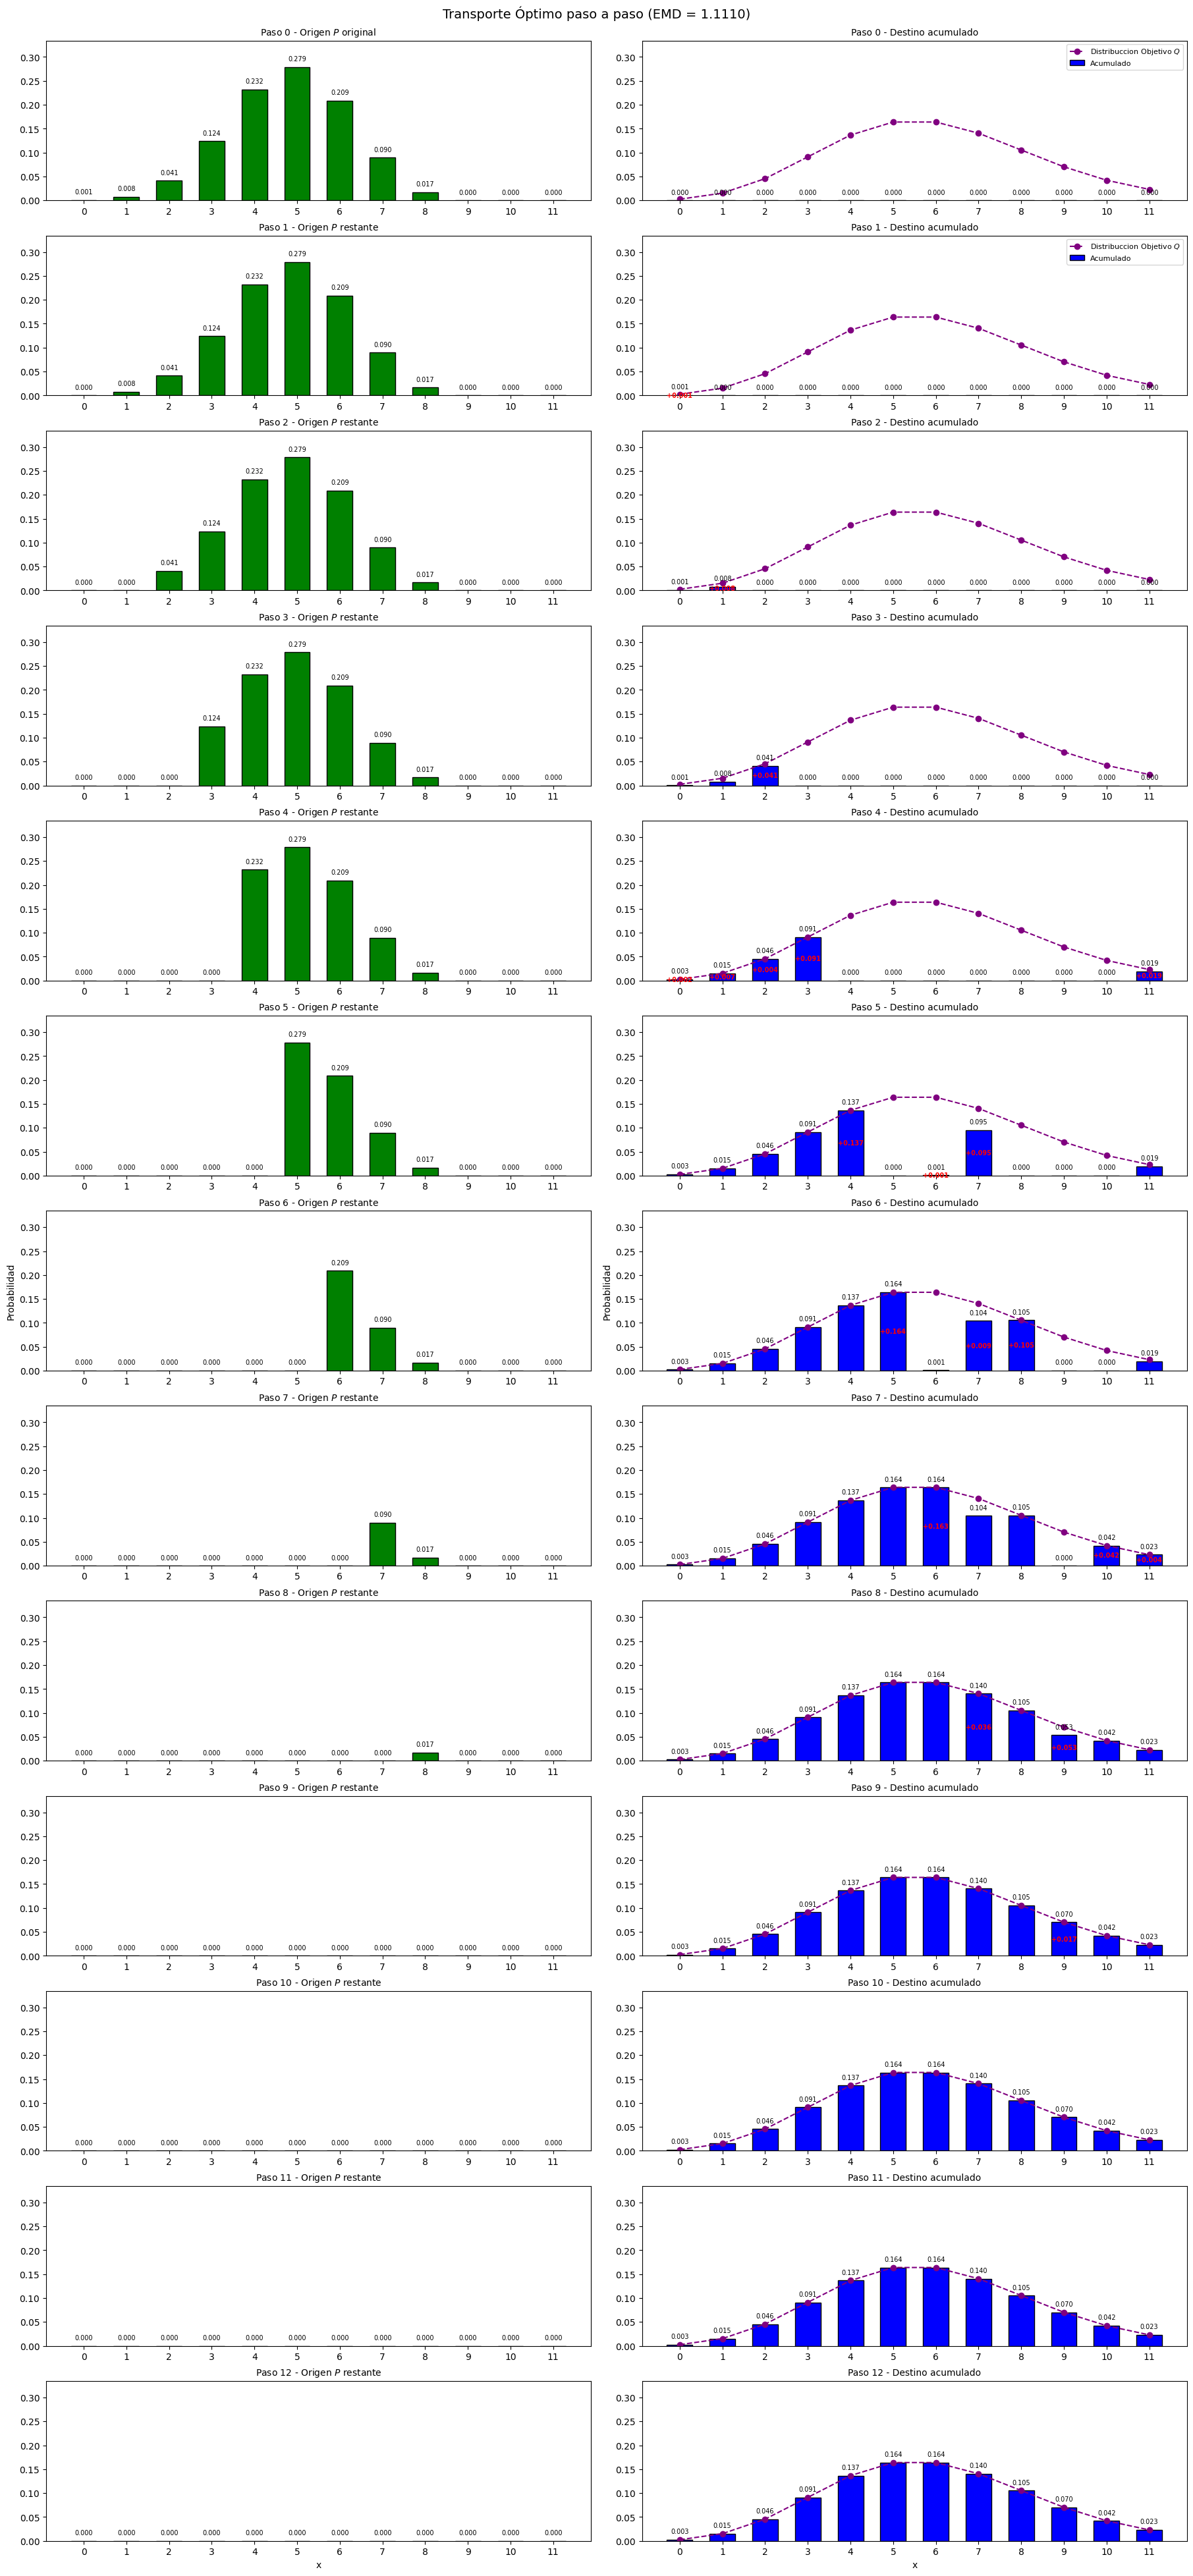

In [11]:
# Definimos los Parametros de las Distribucciones

n_binom = 8 
p = 0.6
lambda_ = n * p

# Definimos el Dominio

x = np.arange(0, 12)
n = len(x)

# Definimos las Distribucciones

P = binom.pmf(x, n_binom, p)
Q = poisson.pmf(x, lambda_)

# Normalizamos Para que Sumen 1 (No extender tanto el Dominio)

P /= P.sum()
Q /= Q.sum()

# Definimos la Matriz de Distancia (Distancia Absoluta)

D = np.abs(x[:, None] - x[None, :])

# Calculamos el Transporte Optimo y la Earth Mover's Distance

gamma_opt = ot.emd(P, Q, D)
C_opt = gamma_opt * D
emd_opt = np.sum(C_opt)

# Visualizamos

fig0, ax0 = plt.subplots(1, 2, figsize = (18, 5))
bar_width = 0.6

ax0[0].bar(x, P, color = 'green', edgecolor = 'black', width = bar_width)
ax0[0].set_title(f"Distribución origen $P \sim Binom({n}, {p})$", fontsize = 12)
ax0[0].set_ylim(0, max(P.max(), Q.max()) * 1.2)
ax0[0].set_xticks(x)

for j in range(n):
    ax0[0].text(x[j], P[j] + 0.01, f"{P[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 8)

ax0[1].bar(x, Q, color = 'blue', edgecolor = 'black', width = bar_width)
ax0[1].set_title(f"Distribución objetivo $Q \sim Pois({lambda_})$", fontsize = 12)
ax0[1].set_ylim(0, max(P.max(), Q.max()) * 1.2)
ax0[1].set_xticks(x)

for j in range(n):
    ax0[0].text(x[j], P[j] + 0.01, f"{P[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 8)
    
for j in range(n):
    ax0[1].text(x[j], Q[j] + 0.01, f"{Q[j]:.3f}", ha='center', va = 'bottom', fontsize = 8)

ax0[0].set_ylabel("Probabilidad")
ax0[0].set_xlabel("x")
ax0[1].set_xlabel("x")
plt.suptitle("Distribuciones iniciales: Origen $P$ y Destino $Q$", fontsize = 14)
plt.tight_layout()
plt.show()

def plot_matrix_with_values(matrix, title, ax, fmt = ".2f", cmap = "Blues"):
    
    im = ax.imshow(matrix, cmap = cmap)
    ax.set_title(title, fontsize = 10)
    ax.set_xlabel("Destino (Q)", fontsize = 8)
    ax.set_ylabel("Origen (P)", fontsize = 8)
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(x, fontsize = 7)
    ax.set_yticklabels(x, fontsize = 7)
    
    for i in range(n):
        for j in range(n):
            val = format(matrix[i, j], fmt)
            ax.text(j, i, val, ha = "center", va = "center", color = "black", fontsize = 6)
            
    plt.colorbar(im, ax = ax, fraction=0.046, pad=0.04)

fig2 = plt.figure(figsize = (18, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

ax0 = fig2.add_subplot(gs[0])
ax1 = fig2.add_subplot(gs[1])
ax2 = fig2.add_subplot(gs[2])

plot_matrix_with_values(D, "Distancias $D$", ax0, fmt=".0f", cmap = "Greens")
plot_matrix_with_values(gamma_opt, "Transporte Óptimo $\\gamma$", ax1, fmt = ".2f", cmap = "Purples")
plot_matrix_with_values(C_opt, f"Costo $\\gamma \\cdot D$\n EMD = {emd_opt:.4f}", ax2, fmt = ".2f", cmap = "Oranges")

plt.tight_layout()
plt.show()

P_remaining = P.copy()
Q_accum = np.zeros_like(Q)

fig3, axs = plt.subplots(n + 1, 2, figsize = (18, 3*(n+1)), constrained_layout = True)

axs[0, 0].bar(x, P, color = 'green', edgecolor = 'black', width = bar_width)
axs[0, 0].set_ylim(0, max(P.max(), Q.max()) * 1.2)
axs[0, 0].set_xticks(x)
axs[0, 0].set_title("Paso 0 - Origen $P$ original", fontsize = 10)

axs[0, 1].bar(x, Q_accum, color = 'blue', edgecolor = 'black', width = bar_width, label = "Acumulado")
axs[0, 1].plot(x, Q, marker = 'o', label = "Distribuccion Objetivo $Q$", color = 'purple', linestyle = '--')
axs[0, 1].set_ylim(0, max(P.max(), Q.max()) * 1.2)
axs[0, 1].set_xticks(x)
axs[0, 1].set_title("Paso 0 - Destino acumulado", fontsize = 10)

for j in range(n):
    axs[0, 0].text(x[j], P[j] + 0.01, f"{P[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
    
for j in range(n):
    axs[0, 1].text(x[j], Q_accum[j] + 0.01, f"{Q_accum[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
    
axs[0, 1].legend(fontsize = 8)

for i in range(n):
    transported = gamma_opt[i, :]
    Q_accum += transported
    P_remaining[i] -= transported.sum()
    P_remaining_step = P_remaining.copy()
    
    axs[i+1, 0].bar(x, P_remaining_step, color = 'green', edgecolor = 'black', width = bar_width)
    axs[i+1, 0].set_ylim(0, max(P.max(), Q.max()) * 1.2)
    axs[i+1, 0].set_xticks(x)
    axs[i+1, 0].set_title(f"Paso {i+1} - Origen $P$ restante", fontsize = 10)    
    
    axs[i+1, 1].bar(x, Q_accum, color = 'blue', edgecolor = 'black', width = bar_width, label = "Acumulado")
    axs[i+1, 1].plot(x, Q, marker = 'o', label = "Distribuccion Objetivo $Q$", color = 'purple', linestyle = '--')
    axs[i+1, 1].set_ylim(0, max(P.max(), Q.max()) * 1.2)
    axs[i+1, 1].set_xticks(x)
    axs[i+1, 1].set_title(f"Paso {i+1} - Destino acumulado", fontsize=10)
    
    for j in range(n):
        axs[i+1, 0].text(x[j], P_remaining_step[j] + 0.01, f"{P_remaining_step[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
        
    for j in range(n):
        axs[i+1, 1].text(x[j], Q_accum[j] + 0.01, f"{Q_accum[j]:.3f}", ha = 'center', va = 'bottom', fontsize = 7)
        
    for j in range(n):
        if transported[j] > 0:
            axs[i+1, 1].text(x[j], Q_accum[j]/2, f"+{transported[j]:.3f}", ha = 'center', va = 'center', fontsize = 7, color = 'red', fontweight = 'bold')
    if i == 0:
        axs[i+1, 1].legend(fontsize = 8)

axs[n//2, 0].set_ylabel("Probabilidad")
axs[n//2, 1].set_ylabel("Probabilidad")
axs[-1, 0].set_xlabel("x")
axs[-1, 1].set_xlabel("x")
plt.suptitle(f"Transporte Óptimo paso a paso (EMD = {emd_opt:.4f})", fontsize = 14)
plt.show()

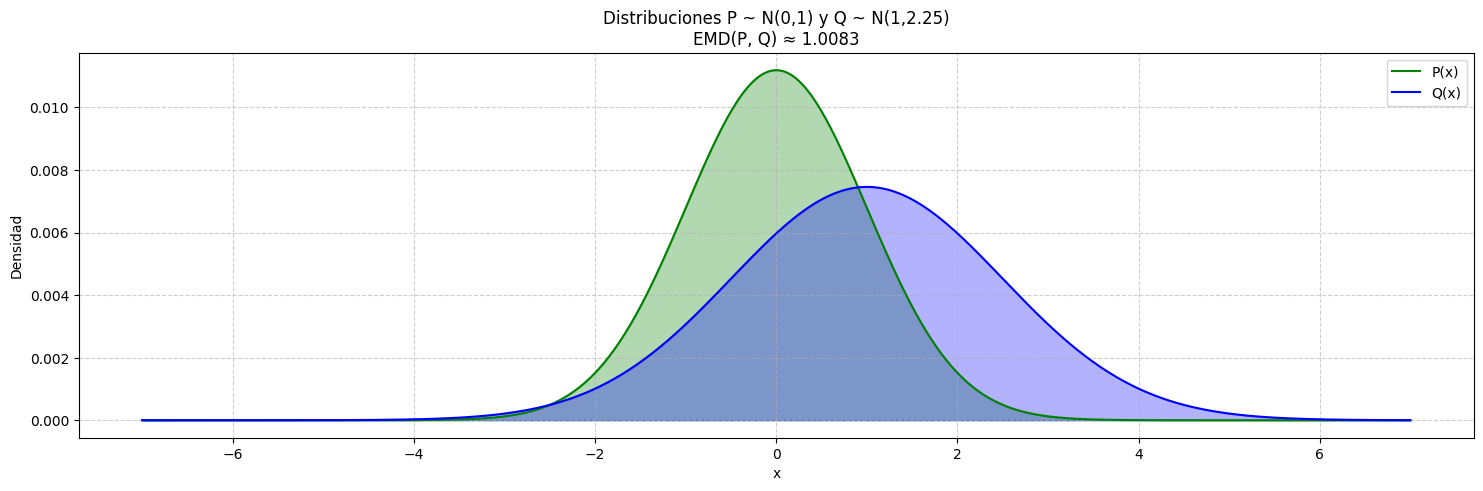

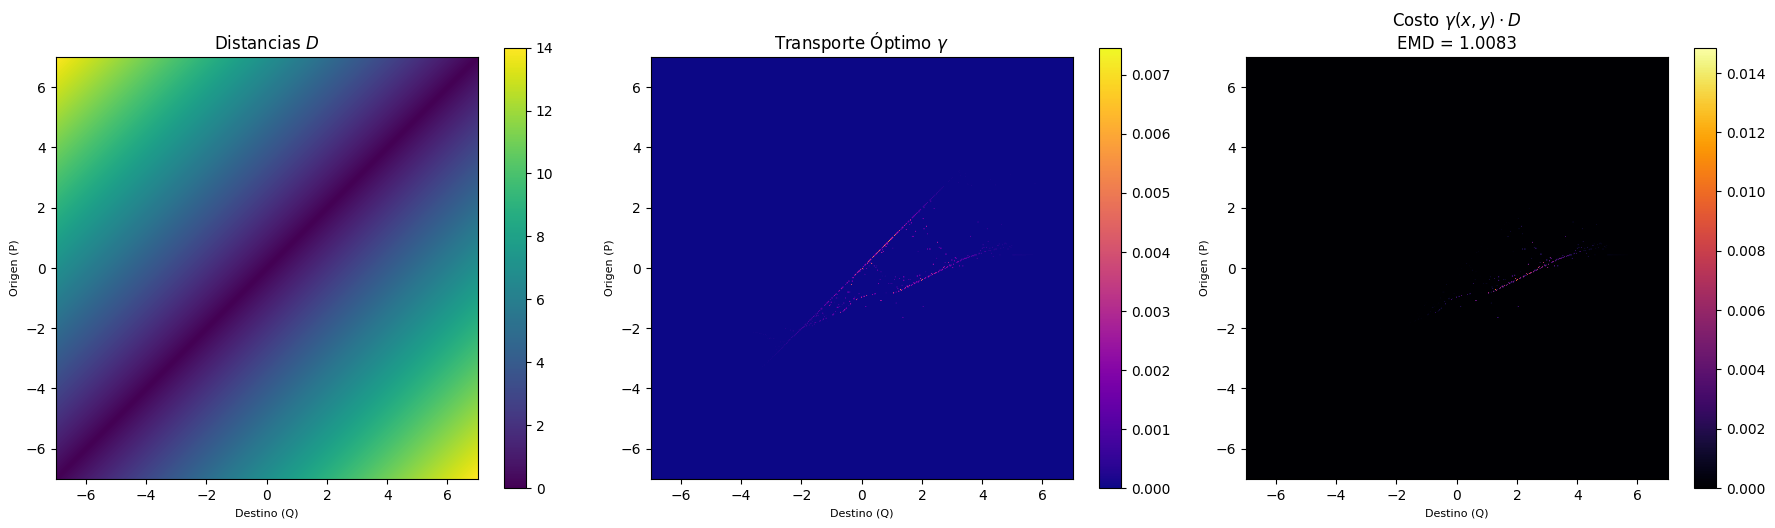

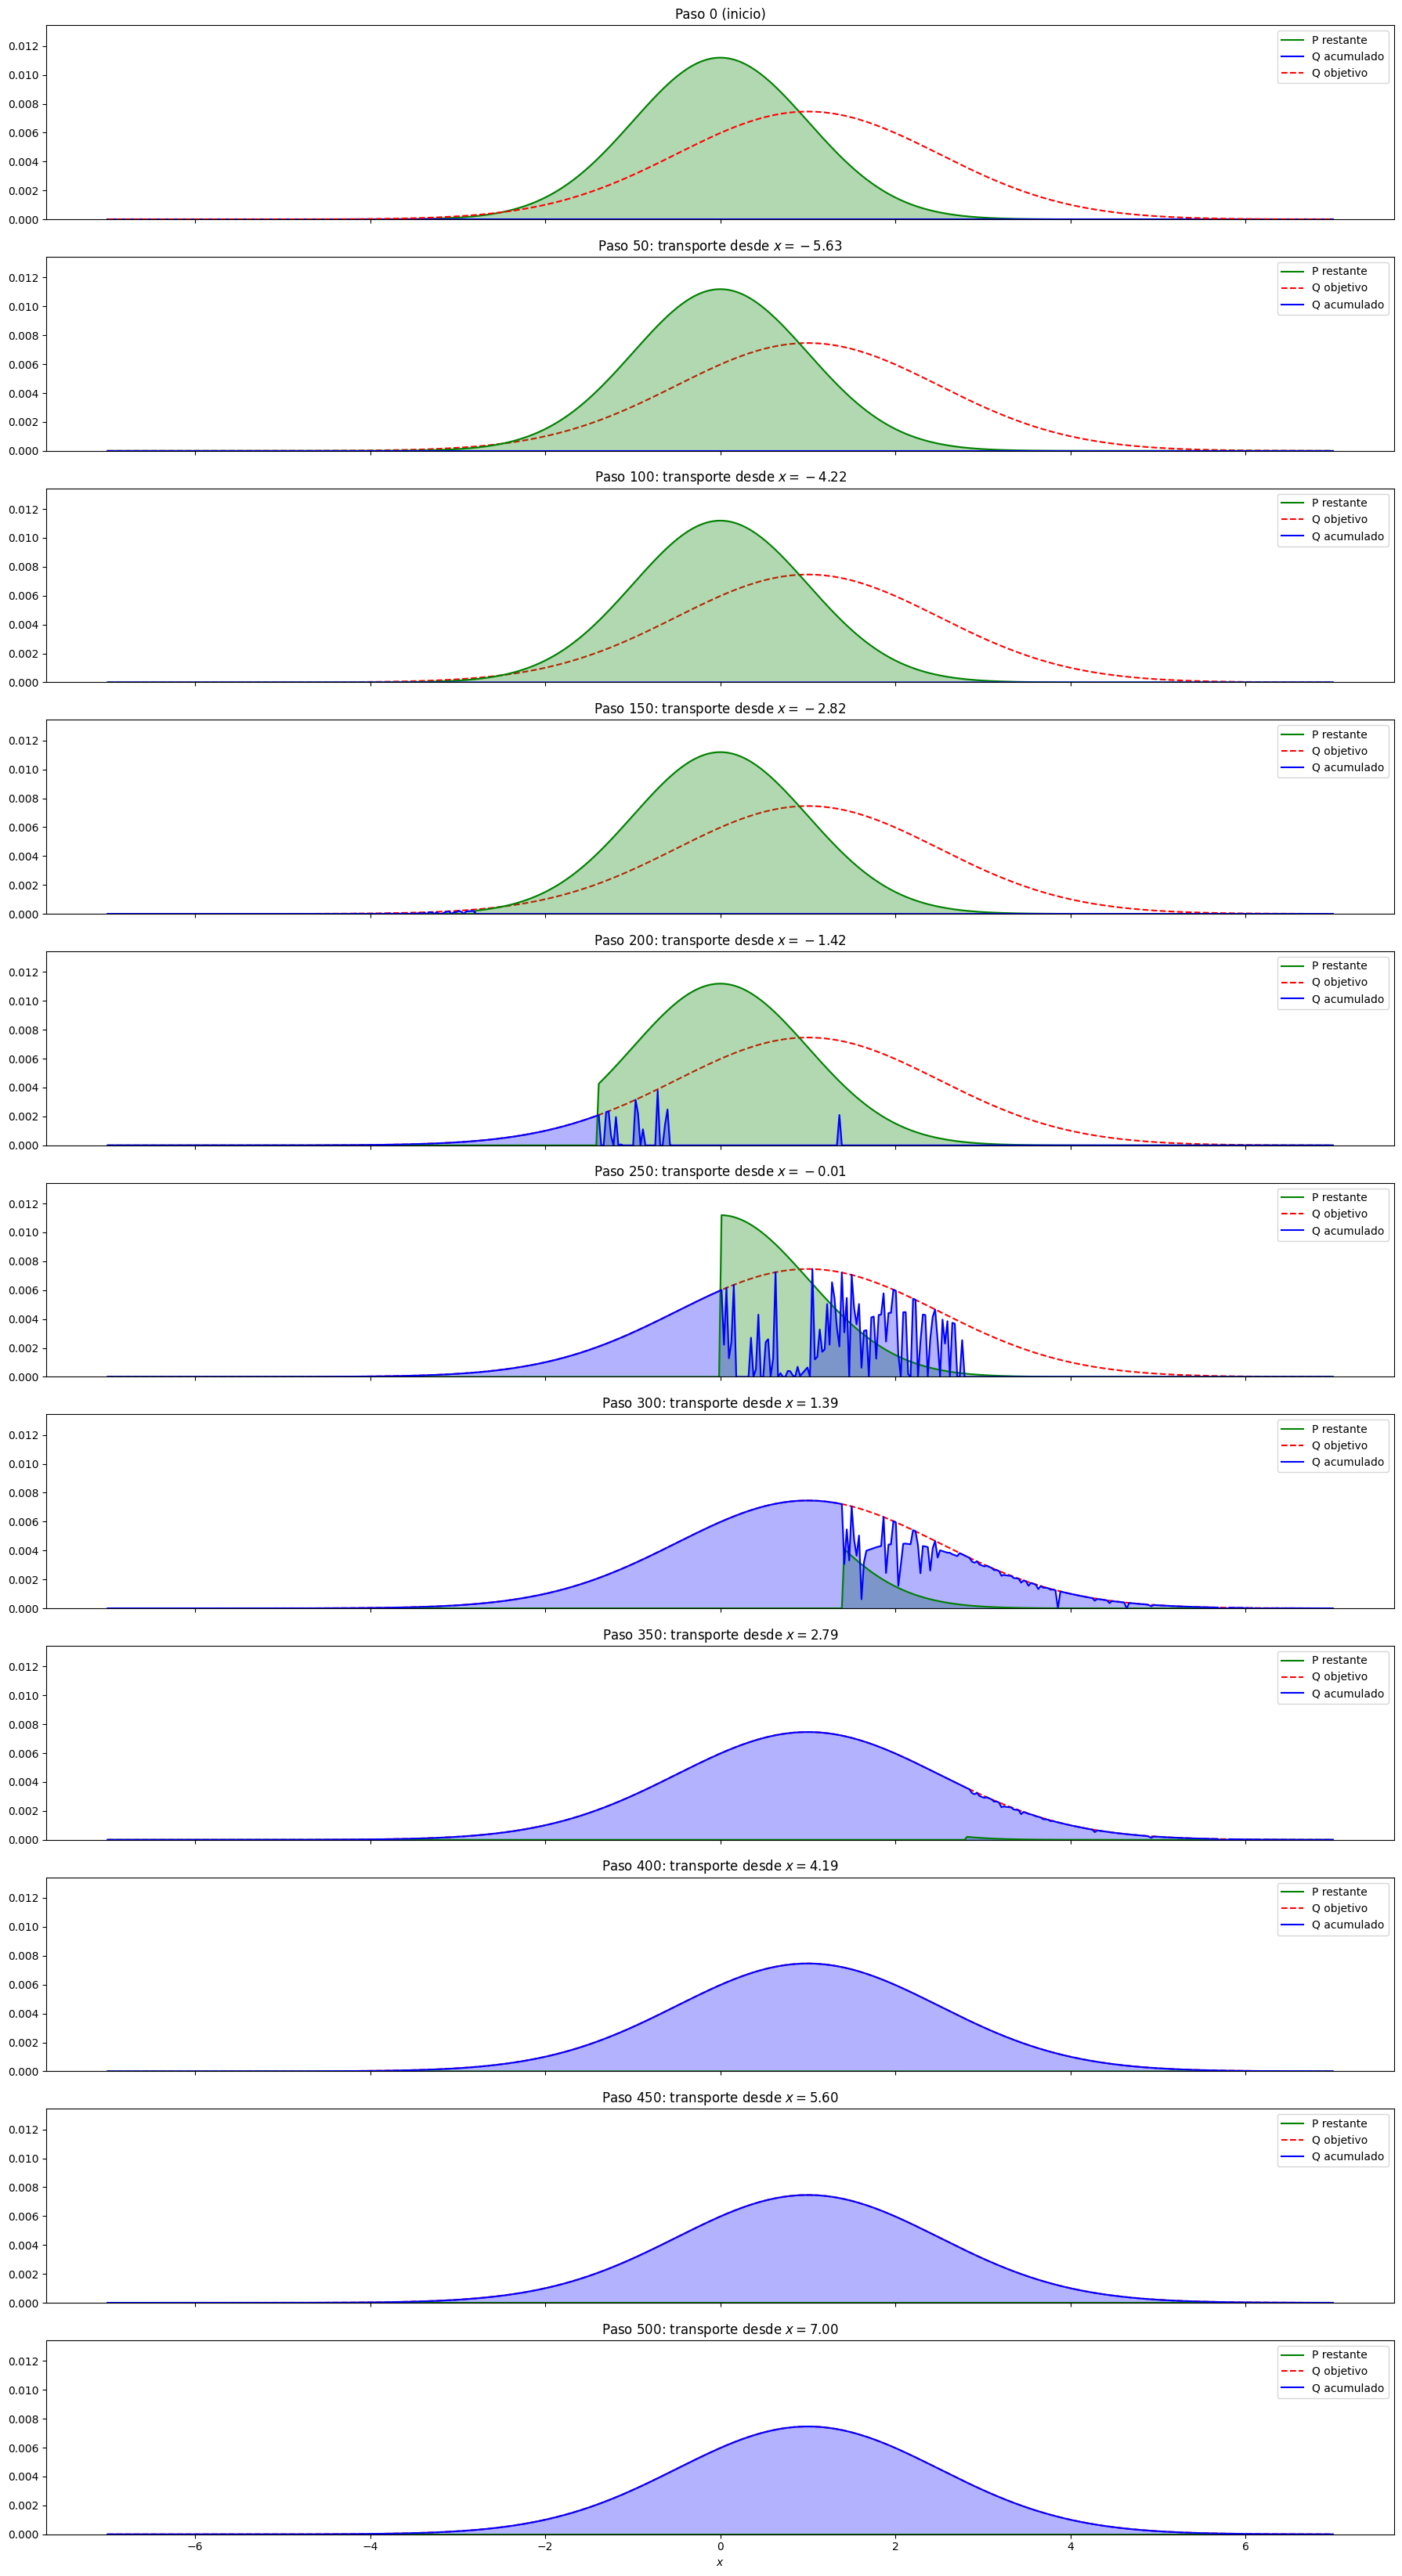

In [12]:
# Definimos los Parametros de las Distribucciones

mu1, sigma1 = 0, 1
mu2, sigma2 = 1, 1.5

# Definimos el Dominio

x = np.linspace(-7, 7, 500)
n_points = 500

# Definimos las Distribucciones

P = norm.pdf(x, mu1, sigma1)
Q = norm.pdf(x, mu2, sigma2)

# Normalizamos Para que Sumen 1 (No extender tanto el Dominio)

P /= P.sum()
Q /= Q.sum()

# Definimos la Matriz de Distancia (Distancia Absoluta)

D = np.abs(x[:, None] - x[None, :])

# Calculamos el Transporte Optimo y la Earth Mover's Distance

gamma_opt = ot.emd(P, Q, D)
C_opt = gamma_opt * D
emd_opt = np.sum(C_opt)

# Visualizamos

plt.figure(figsize = (18, 5))

plt.plot(x, P, color = 'green', label='P(x)')
plt.plot(x, Q, color = 'blue', label='Q(x)')
plt.fill_between(x, P, color = 'green', alpha = 0.3)
plt.fill_between(x, Q, color = 'blue', alpha = 0.3)
plt.title(f'Distribuciones P ~ N({mu1},{sigma1**2}) y Q ~ N({mu2},{sigma2**2})\nEMD(P, Q) ≈ {emd_opt:.4f}')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

im0 = axs[0].imshow(D, cmap = 'viridis', origin = 'lower', extent = [x[0], x[-1], x[0], x[-1]])
axs[0].set_title('Distancias $D$')
axs[0].set_xlabel("Destino (Q)", fontsize = 8)
axs[0].set_ylabel("Origen (P)", fontsize = 8)
fig.colorbar(im0, ax = axs[0])

im1 = axs[1].imshow(gamma_opt, cmap = 'plasma', origin = 'lower',extent = [x[0], x[-1], x[0], x[-1]])
axs[1].set_title('Transporte Óptimo $\\gamma$')
axs[1].set_xlabel("Destino (Q)", fontsize = 8)
axs[1].set_ylabel("Origen (P)", fontsize = 8)
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(C_opt, cmap = 'inferno', origin = 'lower', extent = [x[0], x[-1], x[0], x[-1]])
axs[2].set_title(f'Costo $\\gamma(x,y) \cdot D$\nEMD = {emd_opt:.4f}')
axs[2].set_xlabel("Destino (Q)", fontsize = 8)
axs[2].set_ylabel("Origen (P)", fontsize = 8)
fig.colorbar(im2, ax = axs[2])

plt.tight_layout()
plt.show()

Q_accum = np.zeros_like(Q)
P_remaining = P.copy()

step_interval = 50
num_plots = (n_points // step_interval) + 1

fig, axs = plt.subplots(num_plots, 1, figsize = (18, 3*num_plots), sharex=True)

axs[0].plot(x, P, color = 'green', label = 'P restante')
axs[0].plot(x, Q_accum, color = 'blue', label = 'Q acumulado')
axs[0].fill_between(x, P, color = 'green', alpha = 0.3)
axs[0].fill_between(x, Q_accum, color = 'blue', alpha = 0.3)
axs[0].plot(x, Q, 'r--', label = 'Q objetivo')
axs[0].set_title('Paso 0 (inicio)')
axs[0].legend()
axs[0].set_ylim(0, max(P.max(), Q.max()) * 1.2)

idx_ax = 1
for i in range(n_points):
    transported = gamma_opt[i, :]
    Q_accum += transported
    P_remaining[i] -= transported.sum()

    if (i + 1) % step_interval == 0 or i == n_points - 1:
        axs[idx_ax].plot(x, P_remaining, color = 'green', label = 'P restante')
        axs[idx_ax].plot(x, Q, 'r--', label = 'Q objetivo', zorder = 1)
        axs[idx_ax].plot(x, Q_accum, color='blue', label = 'Q acumulado', zorder = 2)
        axs[idx_ax].fill_between(x, P_remaining, color = 'green', alpha = 0.3)
        axs[idx_ax].fill_between(x, Q_accum, color = 'blue', alpha = 0.3)
        axs[idx_ax].set_title(f'Paso {i+1}: transporte desde $x = {x[i]:.2f}$')
        axs[idx_ax].set_ylim(0, max(P.max(), Q.max()) * 1.2)
        axs[idx_ax].legend(loc='upper right')
        idx_ax += 1

plt.xlabel('$x$')
plt.tight_layout()
plt.show()

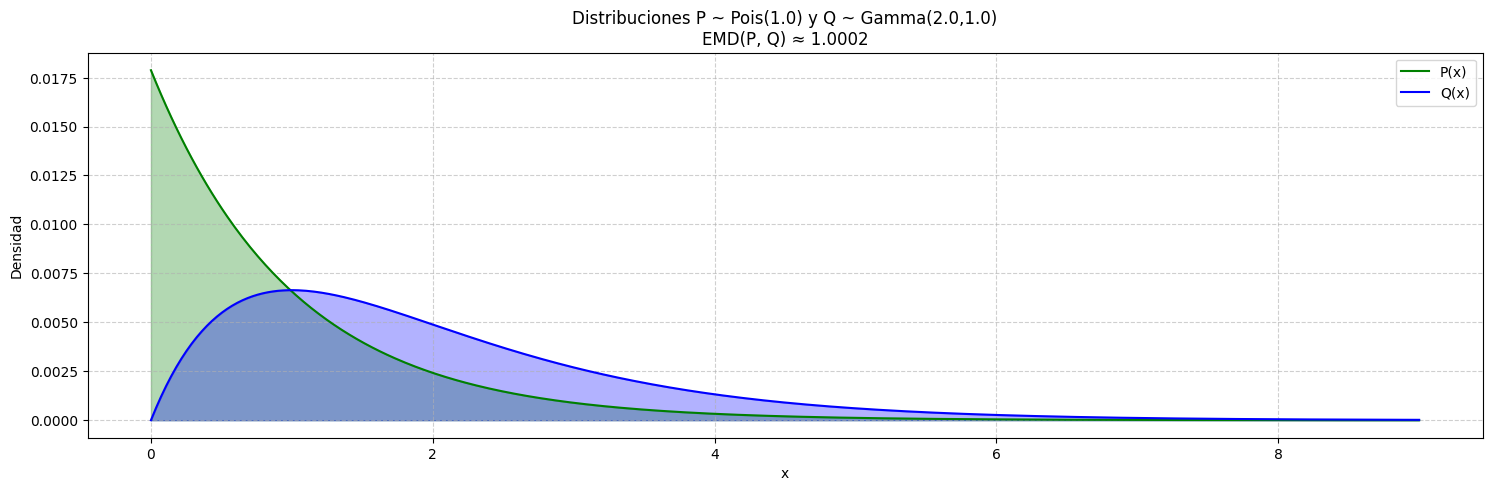

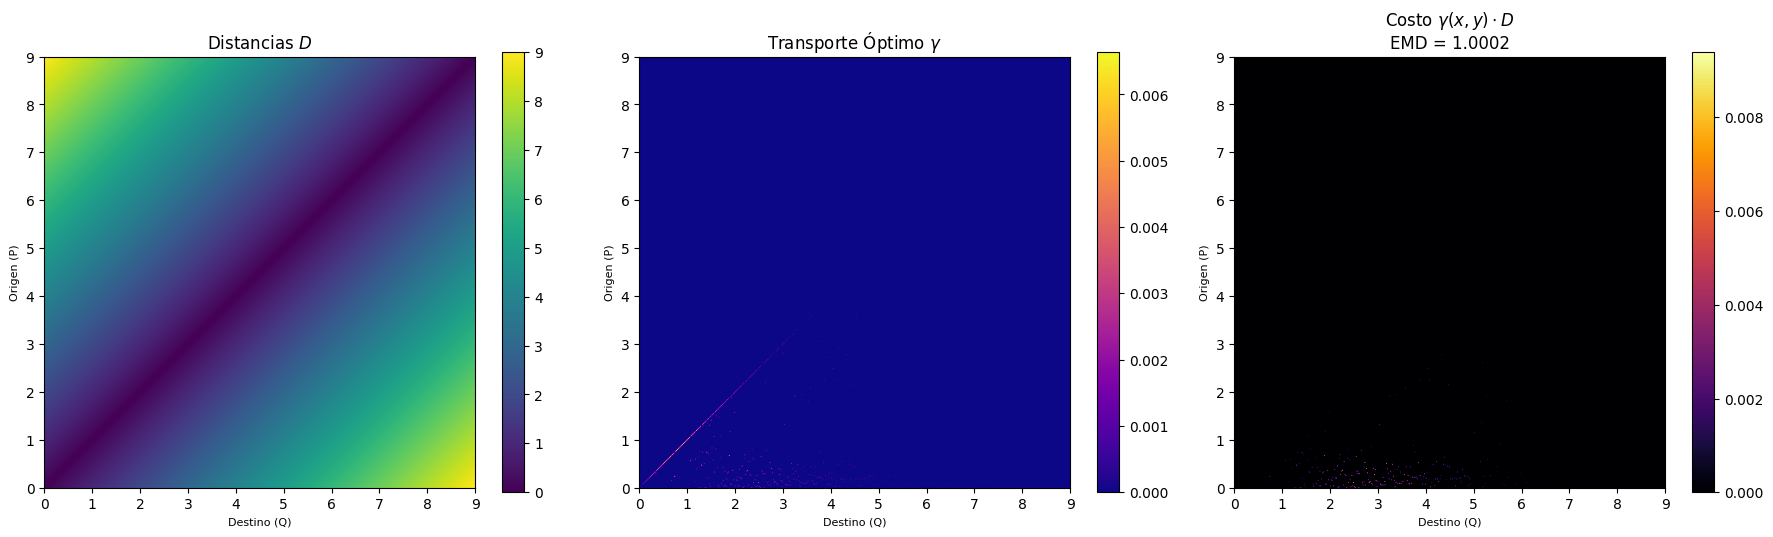

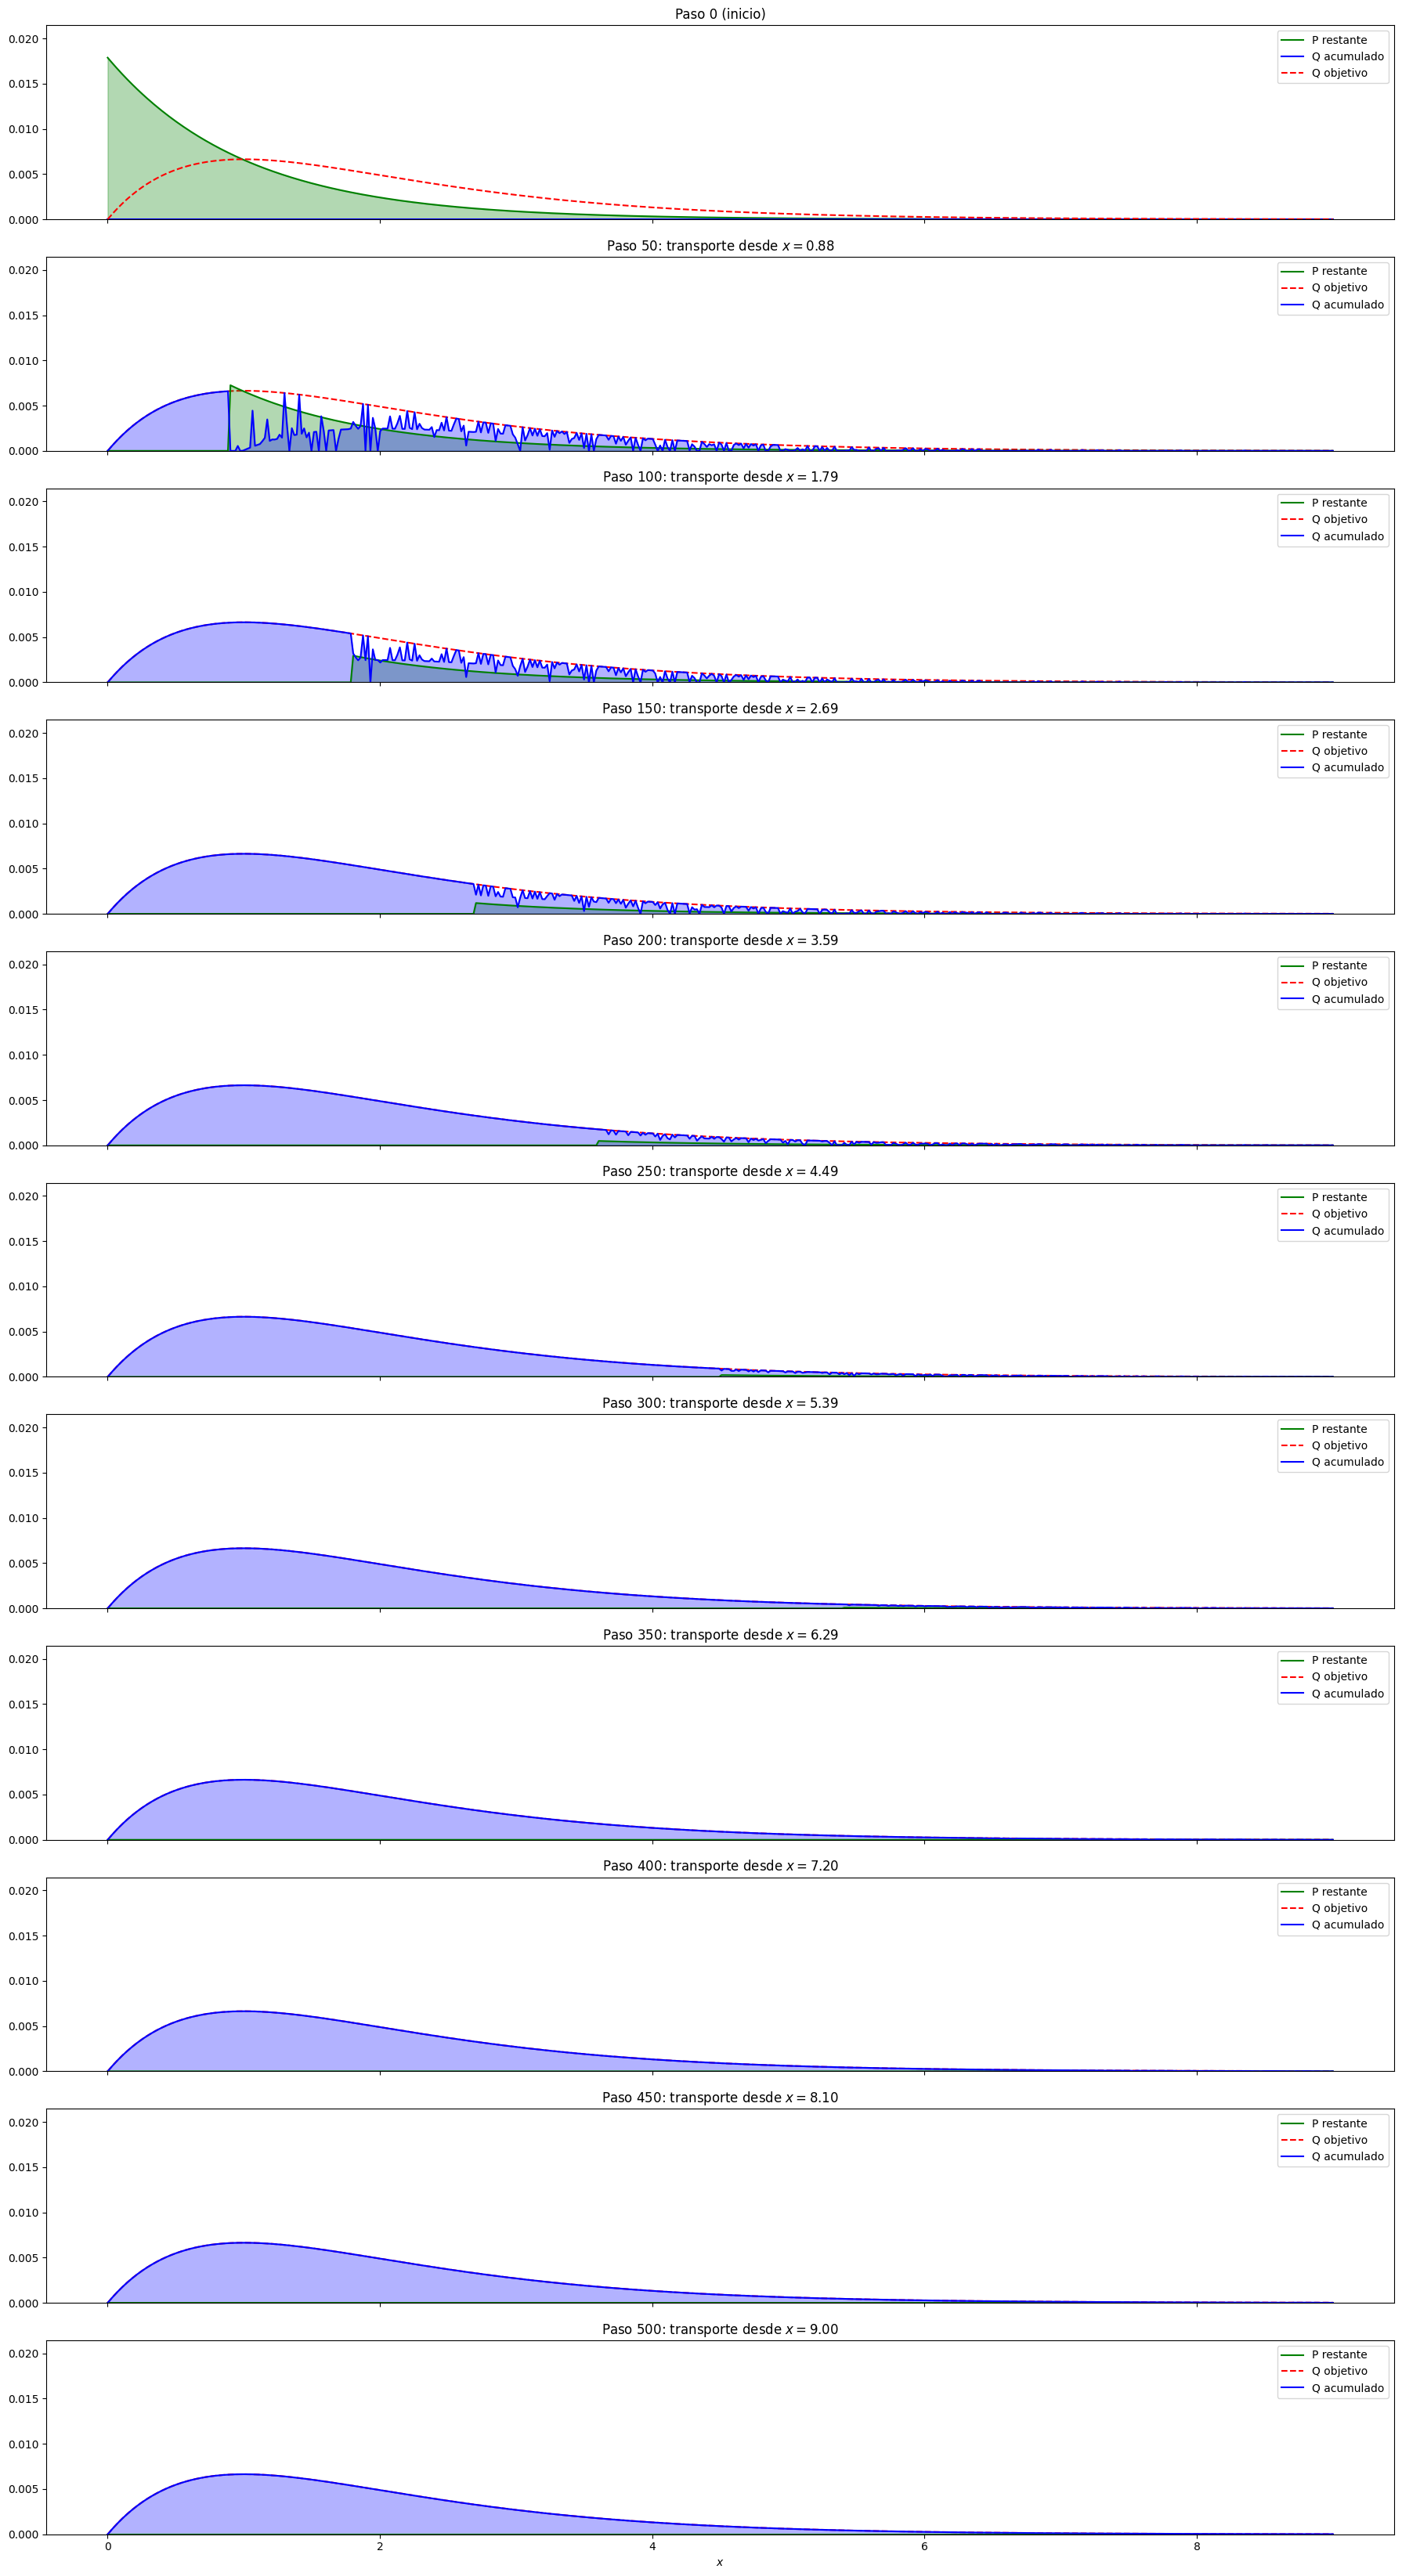

In [13]:
# Definimos los Parametros de las Distribucciones

lambda_ = 1.0 
k = 2.0              
theta = 1 / lambda_ 

# Definimos el Dominio

x = np.linspace(0, 9, 500)
n_points = 500

# Definimos las Distribucciones

P = expon.pdf(x, scale = 1/lambda_) 
Q = gamma.pdf(x, a = k, scale = theta)

# Normalizamos Para que Sumen 1 (No extender tanto el Dominio)

P /= P.sum()
Q /= Q.sum()

# Definimos la Matriz de Distancia (Distancia Absoluta)

D = np.abs(x[:, None] - x[None, :])

# Calculamos el Transporte Optimo y la Earth Mover's Distance

gamma_opt = ot.emd(P, Q, D)
C_opt = gamma_opt * D
emd_opt = np.sum(C_opt)

# Visualizamos

plt.figure(figsize = (18, 5))

plt.plot(x, P, color = 'green', label='P(x)')
plt.plot(x, Q, color = 'blue', label='Q(x)')
plt.fill_between(x, P, color = 'green', alpha = 0.3)
plt.fill_between(x, Q, color = 'blue', alpha = 0.3)
plt.title(f'Distribuciones P ~ Pois({lambda_}) y Q ~ Gamma({k},{theta})\nEMD(P, Q) ≈ {emd_opt:.4f}')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

im0 = axs[0].imshow(D, cmap = 'viridis', origin = 'lower', extent = [x[0], x[-1], x[0], x[-1]])
axs[0].set_title('Distancias $D$')
axs[0].set_xlabel("Destino (Q)", fontsize = 8)
axs[0].set_ylabel("Origen (P)", fontsize = 8)
fig.colorbar(im0, ax = axs[0])

im1 = axs[1].imshow(gamma_opt, cmap = 'plasma', origin = 'lower',extent = [x[0], x[-1], x[0], x[-1]])
axs[1].set_title('Transporte Óptimo $\\gamma$')
axs[1].set_xlabel("Destino (Q)", fontsize = 8)
axs[1].set_ylabel("Origen (P)", fontsize = 8)
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(C_opt, cmap = 'inferno', origin = 'lower', extent = [x[0], x[-1], x[0], x[-1]])
axs[2].set_title(f'Costo $\\gamma(x,y) \cdot D$\nEMD = {emd_opt:.4f}')
axs[2].set_xlabel("Destino (Q)", fontsize = 8)
axs[2].set_ylabel("Origen (P)", fontsize = 8)
fig.colorbar(im2, ax = axs[2])

plt.tight_layout()
plt.show()

Q_accum = np.zeros_like(Q)
P_remaining = P.copy()

step_interval = 50
num_plots = (n_points // step_interval) + 1

fig, axs = plt.subplots(num_plots, 1, figsize = (18, 3*num_plots), sharex=True)

axs[0].plot(x, P, color = 'green', label = 'P restante')
axs[0].plot(x, Q_accum, color = 'blue', label = 'Q acumulado')
axs[0].fill_between(x, P, color = 'green', alpha = 0.3)
axs[0].fill_between(x, Q_accum, color = 'blue', alpha = 0.3)
axs[0].plot(x, Q, 'r--', label = 'Q objetivo')
axs[0].set_title('Paso 0 (inicio)')
axs[0].legend()
axs[0].set_ylim(0, max(P.max(), Q.max()) * 1.2)

idx_ax = 1
for i in range(n_points):
    transported = gamma_opt[i, :]
    Q_accum += transported
    P_remaining[i] -= transported.sum()

    if (i + 1) % step_interval == 0 or i == n_points - 1:
        axs[idx_ax].plot(x, P_remaining, color = 'green', label = 'P restante')
        axs[idx_ax].plot(x, Q, 'r--', label = 'Q objetivo', zorder = 1)
        axs[idx_ax].plot(x, Q_accum, color='blue', label = 'Q acumulado', zorder = 2)
        axs[idx_ax].fill_between(x, P_remaining, color = 'green', alpha = 0.3)
        axs[idx_ax].fill_between(x, Q_accum, color = 'blue', alpha = 0.3)
        axs[idx_ax].set_title(f'Paso {i+1}: transporte desde $x = {x[i]:.2f}$')
        axs[idx_ax].set_ylim(0, max(P.max(), Q.max()) * 1.2)
        axs[idx_ax].legend(loc='upper right')
        idx_ax += 1

plt.xlabel('$x$')
plt.tight_layout()
plt.show()